# Run liquid simulations

## Import `Python` modules

In [1]:
import os
import sys
import pandas
import subprocess
import glob
import random
import math
import numpy as np
import scipy.stats
import umap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2, style='ticks', palette='colorblind')

# Import custom modules
sys.path.append('scripts/')
import design_utils

resultsdir = 'results/'
if not os.path.isdir(resultsdir):
    os.makedirs(resultsdir)

## Define weights and flags files for each energy function

Weights files are versions of the original weights file that Hahnbeom gave me for this test (`data/liquid_sim_weights_files/liquidsim.wts`). The below weights files are modified (if necessary) to match each energy function's weights. For instance, I didn't make any modifications to the weights file for beta_nov16, but I changed the weight for `fa_rep` for `HH_run18E_step147`.

In [2]:
# Define paths to weights and flags files for each
# energy function
e_functions_dict = {
    
    'beta_nov16' : (
        'beta_nov16.wts',
        'flags_beta16'
    ),
    'beta_nov16_r2' : (
        'beta_nov16.wts',
        'flags_beta16'
    ),
    'beta_nov16_r3' : (
        'beta_nov16.wts',
        'flags_beta16'
    ),
    'beta_nov16_r4' : (
        'beta_nov16.wts',
        'flags_beta16'
    ),
    'beta_nov16_r5' : (
        'beta_nov16.wts',
        'flags_beta16'
    ),
    'beta_nov16_r6' : (
        'beta_nov16.wts',
        'flags_beta16'
    ),
    
    'beta16_plus_hpsc_lj_changes' : (
        'beta16_plus_lj_changes.wts',
        'beta16_plus_hpsc_lj_changes_flags'
    ),
    'beta16_plus_hpsc_lj_changes_r2' : (
        'beta16_plus_lj_changes.wts',
        'beta16_plus_hpsc_lj_changes_flags'
    ),
    'beta16_plus_hpsc_lj_changes_r3' : (
        'beta16_plus_lj_changes.wts',
        'beta16_plus_hpsc_lj_changes_flags'
    ),
    
    'beta_nov16_fixed' : (
        'beta_nov16_fixed.wts',
        'flags_beta16'
    ),
    'beta_nov16_fullrep' : (
        'beta_nov16_fullrep.wts',
        'flags_beta16'
    ),
    'HH_run18C_step286' : (
        'HH_run18C_weights_286.wts',
        'HH_run18C_flags_286'
    ),
    'HH_run18E_step147' : (
        'HH_run18E_weights_147.wts',
        'HH_run18E_flags_147'
    ),
    'HH_run18CE_avg' : (
        'HH_run18CEavg_weights.wts',
        'HH_run18CEavg_flags'
    ),
    'HH_run18_guess1' : (
        'HH_run18CEavg_weights.wts',
        'HH_run18_guess1_flags'
    ),
    'HH_run18_guess2' : (
        'HH_run18CEavg_weights.wts',
        'HH_run18_guess2_flags'
    ),
    'HH_run18_guess3' : (
        'HH_run18CEavg_weights.wts',
        'HH_run18_guess3_flags'
    ),
    'HH_run18_guess4' : (
        'HH_run18CEavg_weights.wts',
        'HH_run18_guess4_flags'
    ),
    'HH_run18_guess5' : (
        'HH_run18CEavg_weights.wts',
        'HH_run18_guess5_flags'
    ),
    'HH_run18_guess6' : (
        'HH_run18_guess6.wts',
        'HH_run18_guess6_flags'
    ),
    'HH_run18_guess6_fixed' : (
        'HH_run18_guess6_fixed.wts',
        'HH_run18_guess6_flags'
    ),
    'HH_run18_guess7' : (
        'HH_run18_guess6.wts',
        'HH_run18_guess7_flags'
    ),
    'HH_run18_guess8' : (
        'HH_run18_guess6.wts',
        'HH_run18_guess8_flags'
    ),
    'HH_run18_guess9' : (
        'HH_run18_guess6.wts',
        'HH_run18_guess9_flags'
    ),
    'HH_run18_guess10' : (
        'HH_run18_guess6.wts',
        'HH_run18_guess10_flags'
    ),
    'HH_run18_guess11' : (
        'HH_run18_guess6.wts',
        'HH_run18D_flags_886_modified3'
    ),
    'HH_run18_guess12' : (
        'HH_run18_guess6.wts',
        'HH_run18D_flags_886_modified4'
    ),
    'HH_run18_guess13' : (
        'HH_run18_guess6.wts',
        'HH_run18D_flags_886_modified8'
    ),
    'HH_run18_guess14' : (
        'HH_run18_guess6.wts',
        'HH_run18D_flags_886_modified9'
    ),
    'HH_run18_guess15' : (
        'HH_run18_guess6.wts',
        'HH_run18D_flags_886_modified10'
    ),
    'HH_run18D_886_modified6j' : (
        'HH_run18_guess6.wts',
        'HH_run18D_flags_886_modified6j'
    ),
    'HH_run18D_886_modified6k' : (
        'HH_run18_guess6.wts',
        'HH_run18D_flags_886_modified6k'
    ),
    'HH_run18F_434_mod2d' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod2d'
    ),
    'HH_run18F_434_mod2e' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod2e'
    ),
    'HH_run18F_434_mod2h' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod2h'
    ),
    'HH_run18F_434_mod5a' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5a'
    ),
    'HH_run18F_434_mod5b' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5b'
    ),
    'HH_run18F_434_mod5c' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5c'
    ),
    'HH_run18F_434_mod5d' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5d'
    ),
    'HH_run18F_434_mod5e' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5e'
    ),
    'HH_run18F_434_mod5f' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5f'
    ),
    'HH_run18F_434_mod5h' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5h'
    ),
    'HH_run18F_434_mod5i' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5i'
    ),
    'HH_run18F_434_mod5j' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5j'
    ),
    'HH_run18F_434_mod5k' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5k'
    ),
    'HH_run18F_434_mod5l' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5l'
    ),
    'HH_run18F_434_mod5m' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5m'
    ),
    'HH_run18F_434_mod5n' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5n'
    ),
    'HH_run18F_434_mod5o' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5o'
    ),
    'HH_run18F_434_mod5p' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod5p'
    ),
    'HH_run18F_434_mod6f' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6f'
    ),
    'HH_run18F_434_mod6g' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6g'
    ),
    'HH_run18F_434_mod6h' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6h'
    ),
    'HH_run18F_434_mod6i' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6i'
    ),
    'HH_run18F_434_mod6j' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6j'
    ),
    'HH_run18F_434_mod6k' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6k'
    ),
    'HH_run18F_434_mod6l' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6l'
    ),
    'HH_run18F_434_mod6o' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6o'
    ),
    'HH_run18F_434_mod6p' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6p'
    ),
    'HH_run18F_434_mod6q' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6q'
    ),
    'HH_run18F_434_mod6r' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6r'
    ),
    'HH_run18F_434_mod6s' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod6s'
    ),
    'HH_run18F_434_mod7a' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod7a'
    ),
    'HH_run18F_434_mod7j' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod7j'
    ),
    'HH_run18F_434_mod7j_r2' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod7j'
    ),
    'HH_run18F_434_mod7j_r3' : (
        'HH_run18_guess6.wts',
        'HH_run18F_flags_434_mod7j'
    ),
    
    'HH_run25B_step311_original' : (
        'HH_run25B_weights_311.wts',
        'HH_run25B_flags_311_ls'
    ),
    
    'HH_run25B_step311' : (
        'HH_run25B_weights_311.wts',
        'HH_run25B_flags_311_1d_ls'
    ),
    'HH_run25B_step311_r2' : (
        'HH_run25B_weights_311.wts',
        'HH_run25B_flags_311_1d_ls'
    ),
    'HH_run25B_step311_r3' : (
        'HH_run25B_weights_311.wts',
        'HH_run25B_flags_311_1d_ls'
    ),
    
    'HH_run25B_step311_1e' : (
        'HH_run25B_weights_311.wts',
        'HH_run25B_flags_311_1e_ls'
    ),
    'HH_run25B_step311_1e_r2' : (
        'HH_run25B_weights_311.wts',
        'HH_run25B_flags_311_1e_ls'
    ),
    'HH_run25B_step311_1e_r3' : (
        'HH_run25B_weights_311.wts',
        'HH_run25B_flags_311_1e_ls'
    ),
    
    'HH_run26B_step129_1a' : (
        'HH_run26B_weights_129.wts',
        'HH_run26B_flags_129_1a_ls'
    ),
    'HH_run26B_step129_1a_r2' : (
        'HH_run26B_weights_129.wts',
        'HH_run26B_flags_129_1a_ls'
    ),
    'HH_run26B_step129_1a_r3' : (
        'HH_run26B_weights_129.wts',
        'HH_run26B_flags_129_1a_ls'
    ),
    
    'HH_run26B_step129_1e' : (
        'HH_run26B_weights_129.wts',
        'HH_run26B_flags_129_1e_ls'
    ),
    'HH_run26B_step129_1e_r2' : (
        'HH_run26B_weights_129.wts',
        'HH_run26B_flags_129_1e_ls'
    ),
    'HH_run26B_step129_1e_r3' : (
        'HH_run26B_weights_129.wts',
        'HH_run26B_flags_129_1e_ls'
    ),
}

## Run liquid simulations

First, read in metadata for each molecule

In [3]:
# Read in data
cols = [
    '-', 'ID', 'molecule', 'T', 'density', 'Hvap', 'fullname'
]
exp_df = pandas.read_csv(
    'data/expproperties.dat', sep='\s+', skiprows=2,
    names=cols
)

# Add extra lines for different versions of the same
# molecule (e.g., ethane_R, which has a different
# params file)
molecules = [
    'methanol', 'ethanol', 'propanol', 't-BuOH',
    'phenol',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone',
]
dfs = [exp_df]
for molecule in molecules:
    data = exp_df[exp_df['molecule'] == molecule].copy()
    assert len(data) == 1
    data['molecule'] = data['molecule'].replace(
        molecule, f'{molecule}_Ra'
    )
    dfs.append(data)

    data = exp_df[exp_df['molecule'] == molecule].copy()
    assert len(data) == 1
    data['molecule'] = data['molecule'].replace(
        molecule, f'{molecule}_Rb'
    )
    dfs.append(data)
    
exp_df = pandas.concat(dfs)
exp_df.head(n=5)

- ID     molecule    T  density  Hvap     fullname
0  -  1       ethane  185    0.546  3.51       ethane
1  -  2      propane  231    0.581  4.49      propane
2  -  3       butane  273    0.602  5.02       butane
3  -  4    isobutane  298    0.551  4.57    isobutane
4  -  5  cyclohexane  298    0.774  7.89  cyclohexane

Next, carry out the commands to run the simultations

In [4]:
# Define input variables
cwd = os.getcwd().replace('/mnt', '')
rosetta_scrpts_path = '/home/haddox/Rosetta/main/source/bin/rosetta_scripts.default.linuxgccrelease'
xml = os.path.join(cwd, 'scripts/prod.xml')

# Cycle over molecules and energy functions, running
# the test on each combo
molecules = []
# molecules = [
#     'methanol_Ra', #'methanol_Rb',
#     'ethanol_Ra', #'ethanol_Rb',
#     'propanol_Ra', #'propanol_Rb',
#     't-BuOH_Ra', #'t-BuOH_Rb',
#     'phenol_Ra', #'phenol_Rb',
#     'acetamide_Ra',
#     'NMA_Ra', #'NMA_Rb',
#     'NMF_Ra', #'NMF_Rb',
#     'DME_Ra', #'DME_Rb',
#     'ethanal_Ra',
#     'acetone_Ra',
# ]
#molecules = ['ethanal_Ra', 'acetone_Ra',]
molecules += [
    'ethane', 'propane', 'butane',
    'isobutane', 'cyclohexane',
    'benzene', 'toluene',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH',
    'CH3SCH3', 'CH3SSCH3',
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone',   
]
e_functions = [
    'beta_nov16',
    'beta_nov16_r2',
    'beta_nov16_r3',
    'beta_nov16_r4',
    'beta_nov16_r5',
    'beta_nov16_r6',
    
    'beta16_plus_hpsc_lj_changes',
    'beta16_plus_hpsc_lj_changes_r2',
    'beta16_plus_hpsc_lj_changes_r3',
    
    # 'HH_run25B_step311',
    # 'HH_run25B_step311_r2',
    # 'HH_run25B_step311_r3',
    # 'HH_run26B_step129_1e',
    # 'HH_run26B_step129_1e_r2',
    # 'HH_run26B_step129_1e_r3',
    
    #'HH_run18C_step286',
    #'HH_run18_guess12',
    #'HH_run18_guess14',
    #'HH_run18_guess15',
    #'HH_run18D_886_modified6j',
    #'HH_run18D_886_modified6k',
    #'HH_run18F_434_mod2d',
    #'HH_run18F_434_mod2e',
    #'HH_run18F_434_mod2h',
    #'HH_run18F_434_mod5a',
    #'HH_run18F_434_mod5b',
    #'HH_run18F_434_mod5c',
    #'HH_run18F_434_mod5d',
    #'HH_run18F_434_mod5e',
    #'HH_run18F_434_mod5f',
    #'HH_run18F_434_mod5h',
    #'HH_run18F_434_mod5i',
    #'HH_run18F_434_mod5j',
    #'HH_run18F_434_mod5k',
    #'HH_run18F_434_mod5l',
    #'HH_run18F_434_mod5m',
    #'HH_run18F_434_mod5n',
    #'HH_run18F_434_mod5o',
    #'HH_run18F_434_mod5p',
    #'HH_run18F_434_mod6f',
    #'HH_run18F_434_mod6g',
    #'HH_run18F_434_mod6h',
    #'HH_run18F_434_mod6i',
    #'HH_run18F_434_mod6j',
    #'HH_run18F_434_mod6k',
    #'HH_run18F_434_mod6l',
    #'HH_run18F_434_mod6o',
    #'HH_run18F_434_mod6p',
    #'HH_run18F_434_mod6q',
    #'HH_run18F_434_mod6r',
    #'HH_run18F_434_mod6s',
#     'HH_run18F_434_mod7j',
#     'HH_run18F_434_mod7j_r2',
#     'HH_run18F_434_mod7j_r3',
]
for molecule in molecules:
    
    # Get inputs for the current molecule
    input_pdb = os.path.join(
        cwd,
        f'data/{molecule}/LG_0001.pdb'
    )
    if not os.path.isfile(input_pdb):
        continue
    params_file = os.path.join(
        cwd,
        f'data/{molecule}/LG.params'
    )
    #extra_group_def_file = os.path.join(
    #    cwd,
    #    f'data/{molecule}/extra_group_def.dat'
    #)
    temp = int(exp_df[exp_df['molecule'] == molecule]['T'])
    density = float(exp_df[exp_df['molecule'] == molecule]['density'])

    for e_function in e_functions:
        
        if '_R' in molecule and 'beta' in e_function:
            continue
        
        # Get inputs for the current energy function
        weights_file = os.path.join(
            cwd,
            'data/liquid_sim_weights_files/',
            e_functions_dict[e_function][0]
        )
        flags_file = os.path.join(
            '/home/haddox/2019/optE_eval/data/',
            e_functions_dict[e_function][1]
        )
        liquid_sim_flags_file = os.path.join(
            cwd,
            'data/flags.liquidsim'
        )
        #assert os.path.isfile(weights_file)
        #assert os.path.isfile(flags_file)

        # Define the output directory and output files
        output_dir = os.path.join(
            cwd,
            resultsdir,
            'four_by_four_sim2',
            e_function,
            molecule + '/'
        )
        scfilename = os.path.join(
            output_dir,
            'prod.sc'
        )
        outname = os.path.join(
            output_dir,
            'prod.out'
        )
        
        # Run the command if the output directory doesn't
        # already exist
        if not os.path.isdir(output_dir):
            os.makedirs(output_dir)

            # Assemble the command
            cmd = ' '.join([
                rosetta_scrpts_path,
                f'@{liquid_sim_flags_file}',
                f'@{flags_file}',
                f'-extra_res_fa {params_file}',
                f'-parser:protocol {xml}',
                f'-s {input_pdb}',
                f'-out:prefix {output_dir}',
                #f'-score:elec_group_extrafile {extra_group_def_file}',
                '-parser:script_vars',
                f'weights_file={weights_file}',
                'nmol=4',
                f'scfilename={scfilename}',
                f'outname={outname}',
                f'density={density}',
                f'temperature={temp}',
                'istart=1'
            ])

            # Run the command
            sbatch_file = os.path.join(
                output_dir,
                f'run.sbatch'
            )
            if not os.path.isfile(sbatch_file):
                print(molecule, e_function)
                raise ValueError()
                design_utils.WriteSbatchFile(
                    sbatch_file,
                    command=cmd,
                    queue_type='cpu',
                    memory='4g'
                )
                subprocess.check_call(
                    ['sbatch', '-t', '5-0', 'run.sbatch'],
                    cwd=output_dir
                )
                #####! sbatch {sbatch_file}
                #raise ValueError(sbatch_file)

**To do**:
* updated job time from 7-0 to 5-0 on Sunday
* check that job goes past 1.5 days

Restart runs

In [5]:
e_functions = [
    'beta16_plus_hpsc_lj_changes',
    # 'beta16_plus_hpsc_lj_changes_r2',
    # 'beta16_plus_hpsc_lj_changes_r3',
]
molecules = [
    #'ethane',
    #'propane', 'butane', 'isobutane', 'cyclohexane',
    #'benzene', 'toluene'
]
molecules += [
    'ethane', 'propane', 'butane',
    'isobutane', 'cyclohexane',
    'benzene', 'toluene',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH',
    'CH3SCH3', 'CH3SSCH3',
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone',   
]
for molecule in molecules:

    continue 
    
    # Get inputs for the current molecule
    restart_pdb = f'data/{molecule}/restart.pdb'
    params_file = f'data/{molecule}/LG.params'
    temp = int(exp_df[exp_df['molecule'] == molecule]['T'])
    density = float(exp_df[exp_df['molecule'] == molecule]['density'])


    for e_function in e_functions:
    
        # Get inputs for the current energy function
        weights_file = os.path.join(
            'data/liquid_sim_weights_files/',
            e_functions_dict[e_function][0]
        )
        flags_file = os.path.join(
            '/home/haddox/2019/optE_eval/data/',
            e_functions_dict[e_function][1]
        )

        # Define the output directory and output files
        # output_dir = os.path.join(
        #     resultsdir,
        #     e_function,
        #     molecule + '/'
        # )
        output_dir = os.path.join(
            cwd,
            resultsdir,
            'four_by_four_sim2',
            e_function,
            molecule + '/'
        )
        scfilename = os.path.join(
            output_dir,
            'prod.sc'
        )
        outname = os.path.join(
            output_dir,
            'prod.out'
        )

        # Determine the final step of the previous run
        # by looking at the last entry in the .sc file
        df = pandas.read_csv(scfilename, sep='\s+')
        df['step'] = df['description'].apply(
            lambda x: int(x.replace('simulate_', '').replace('equilibrate_', ''))
        )
        last_step = df['step'].iloc[-1]
        last_density = df['density'].iloc[-1]

        # Assemble the command
        cmd = ' '.join([
            rosetta_scrpts_path,
            '@data/flags.liquidsim',
            f'@{flags_file}',
            f'-extra_res_fa {params_file}',
            f'-parser:protocol {xml}',
            f'-s {restart_pdb}',
            '-parser:script_vars',
            f'weights_file={weights_file}',
            'nmol=4',
            f'scfilename={scfilename}',
            f'outname={outname}',
            f'density={last_density}',
            f'temperature={temp}',
            f'istart={last_step}'
        ])

        # Run the command
        max_n_restarts = 1
        n_restarts = len(glob.glob(os.path.join(
            output_dir,
            f'restart_run_*.sbatch'
        )))
        if n_restarts < max_n_restarts:
            sbatch_file = os.path.join(
                output_dir,
                f'restart_run_{n_restarts+1}.sbatch'
            )
            print(sbatch_file)
            if not os.path.isfile(sbatch_file):
                print(molecule, e_function)
                design_utils.WriteSbatchFile(
                    sbatch_file,
                    command=cmd,
                    queue_type='cpu',
                    memory='4g'
                )
                ! sbatch -t 5-0 {sbatch_file}

Read in data

In [6]:
molecules = [
    'ethane', 'propane', 'butane',
    'isobutane', 'cyclohexane',
    'benzene', 'toluene',
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH',
    'CH3SCH3', 'CH3SSCH3',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone',
]
molecules += [
    f'{molecule}_Ra' for molecule in molecules
]
molecules += [
    f'{molecule}_Rb' for molecule in molecules
]
e_functions = [
    'beta_nov16',
    'beta_nov16_r2',
    'beta_nov16_r3',
    'beta_nov16_r4',
    
    'beta16_plus_hpsc_lj_changes',
    'beta16_plus_hpsc_lj_changes_r2',
    'beta16_plus_hpsc_lj_changes_r3',
    # 'beta_nov16_fullrep',
    # 'beta_nov16_fixed',
#     'HH_run18C_step286',
#     'HH_run18_guess12',
#     'HH_run18_guess14',
#     'HH_run18F_434_mod2d',
#     'HH_run18F_434_mod2e',
#     'HH_run18F_434_mod2h',
#     'HH_run18F_434_mod5a',
#     'HH_run18F_434_mod5b',
#     'HH_run18F_434_mod5c',
#     'HH_run18F_434_mod5d',
#     'HH_run18F_434_mod5e',
#     'HH_run18F_434_mod5f',
#     'HH_run18F_434_mod5h',
#     'HH_run18F_434_mod5i',
#     'HH_run18F_434_mod5j',
#     'HH_run18F_434_mod5k',
#     'HH_run18F_434_mod5l',
#     'HH_run18F_434_mod5m',
#     'HH_run18F_434_mod5n',
#     'HH_run18F_434_mod5o',
#     'HH_run18F_434_mod5p',
#     'HH_run18F_434_mod6f',
#     'HH_run18F_434_mod6g',
#     'HH_run18F_434_mod6h',
#     'HH_run18F_434_mod6i',
#     'HH_run18F_434_mod6j',
#     'HH_run18F_434_mod6k',
#     'HH_run18F_434_mod6l',
#     'HH_run18F_434_mod6o',
#     'HH_run18F_434_mod6p',
#     'HH_run18F_434_mod6q',
#     'HH_run18F_434_mod6r',
#     'HH_run18F_434_mod6s',
    
    # 'HH_run18F_434_mod7j',
    # 'HH_run18F_434_mod7j_r2',
    # 'HH_run18F_434_mod7j_r3',
    # 'HH_run25B_step311',
    # 'HH_run25B_step311_r2',
    # 'HH_run25B_step311_r3',
    # 'HH_run26B_step129_1a',
    # 'HH_run26B_step129_1a_r2',
    # 'HH_run26B_step129_1a_r3',
    # 'HH_run25B_step311_1e',
    # 'HH_run25B_step311_1e_r2',
    # 'HH_run25B_step311_1e_r3',
    # 'HH_run26B_step129_1e',
    # 'HH_run26B_step129_1e_r2',
    # 'HH_run26B_step129_1e_r3',
]
dfs = []
for molecule in molecules:
    for e_function in e_functions:
        f = f'results/four_by_four_sim2/{e_function}/{molecule}/prod.sc'
        if not os.path.isfile(f):
            continue
        df = pandas.read_csv(f, sep='\s+')
        df['molecule'] = molecule
        df['e_function'] = e_function
        dfs.append(df)
        
scores_df = pandas.concat(dfs, sort=False)
del dfs

# Add a column indicating if it's an equilibration or
# simulation step
scores_df['simulation_step'] = \
    scores_df['description'].str.contains('simulate_')


# Add a column that gives the step number of each
# score
scores_df['step'] = scores_df['description'].apply(
    lambda x: float(
        x.replace('equilibrate_', '').replace('simulate_', '')
    ) / 1e6
)

# Add a column giving the temperature from the experimental
# measurements for each molecule
scores_df = scores_df.merge(
    exp_df[['molecule', 'T']], on='molecule'
)

# Add columns for computing the heat of vaporization
scores_df['calc_intraLJ'] = scores_df.apply(
    lambda row:
        row['fa_intra_atr_xover4'] + \
        row['fa_intra_rep_xover4'],
    axis=1
)

scores_df['calc_intraE'] = \
    scores_df['calc_intraLJ'] + scores_df['fa_intra_elec']

scores_df['H'] = scores_df.apply(
    lambda row: \
        0.5 * (row['score'] - row['calc_intraE'] + row['LJcorr']),
    axis=1
)

N = 64
kb = 0.0019872065 #kcal/molK
scores_df['Hvap'] = scores_df.apply(
    lambda row: (-row['H']/N) + (kb*row['T']),
    axis=1
)

In [7]:
est_dict = {
    key : []
    for key in [
        'e_function', 'molecule', 'est_density', 'est_Hvap'
    ]
}
molecules = [
    'ethane', 'propane', 'butane',
    'isobutane', 'cyclohexane',
    'benzene', 'toluene',
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH',
    'CH3SCH3', 'CH3SSCH3',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone',
]
molecules += [
    f'{molecule}_Ra' for molecule in molecules
]
molecules += [
    f'{molecule}_Rb' for molecule in molecules
]
e_functions = [
    'beta_nov16',
    'beta_nov16_r2',
    'beta_nov16_r3',
    'beta_nov16_r4',
    
    'beta16_plus_hpsc_lj_changes',
    'beta16_plus_hpsc_lj_changes_r2',
    'beta16_plus_hpsc_lj_changes_r3',
    
#     'HH_run18C_step286',
#     'HH_run18_guess12',
#     'HH_run18_guess14',
#     'HH_run18F_434_mod2h',
#     'HH_run18F_434_mod5a',
#     'HH_run18F_434_mod5b',
#     'HH_run18F_434_mod5c',
#     'HH_run18F_434_mod5d',
#     'HH_run18F_434_mod5e',
#     'HH_run18F_434_mod5f',
#     'HH_run18F_434_mod5h',
#     'HH_run18F_434_mod5i',
#     'HH_run18F_434_mod5j',
#     'HH_run18F_434_mod5k',
#     'HH_run18F_434_mod5l',
#     'HH_run18F_434_mod5m',
#     'HH_run18F_434_mod5n',
#     'HH_run18F_434_mod5o',
#     'HH_run18F_434_mod5p',
#     'HH_run18F_434_mod6f',
#     'HH_run18F_434_mod6g',
#     'HH_run18F_434_mod6h',
#     'HH_run18F_434_mod6i',
#     'HH_run18F_434_mod6j',
#     'HH_run18F_434_mod6k',
#     'HH_run18F_434_mod6l',
#     'HH_run18F_434_mod6o',
#     'HH_run18F_434_mod6p',
#     'HH_run18F_434_mod6q',
#     'HH_run18F_434_mod6r',
#     'HH_run18F_434_mod6s',
    
    # 'HH_run18F_434_mod7j',
    # 'HH_run18F_434_mod7j_r2',
    # 'HH_run18F_434_mod7j_r3',
    
    # 'HH_run25B_step311',
    # 'HH_run25B_step311_r2',
    # 'HH_run25B_step311_r3',
    # 'HH_run26B_step129_1a',
    # 'HH_run26B_step129_1a_r2',
    # 'HH_run26B_step129_1a_r3',
    
    # 'HH_run25B_step311_1e',
    # 'HH_run25B_step311_1e_r2',
    # 'HH_run25B_step311_1e_r3',
    # 'HH_run26B_step129_1e',
    # 'HH_run26B_step129_1e_r2',
    # 'HH_run26B_step129_1e_r3',
]
for e_function in e_functions:
    for molecule in molecules:

        # Get data for small molecule and energy function
        # of interest for steps between 0.5-1 million
        data = scores_df[
            (scores_df['e_function'] == e_function) &
            (scores_df['molecule'] == molecule) &
            (scores_df['simulation_step'] == True)
            #(scores_df['step'] >= sim_cutoff)
        ]
        if len(data) == 0:
            continue
        if data['step'].max() < 0.1:
            continue
        #print(molecule, data['step'].min(), data['step'].max())

        # Compute the mean density and mean Hvap
        est_dict['e_function'].append(e_function)
        est_dict['molecule'].append(molecule)
        est_dict['est_density'].append(data['density'].mean())
        est_dict['est_Hvap'].append(data['Hvap'].mean())
    
# Convert data into dataframe
est_df = pandas.DataFrame(est_dict)

# Add entries for beta_nov16 for molecules with
# alternate atom typing (Ra or Rb), copying results
# from molecule with standard atom typing
molecules = [
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH',
    'CH3SCH3', 'CH3SSCH3',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone',
]

if False:
    beta_reps = [
        'beta_nov16', 'beta_nov16_r2', 'beta_nov16_r3',
        'beta16_plus_hpsc_lj_changes',
        'beta16_plus_hpsc_lj_changes_r2',
        'beta16_plus_hpsc_lj_changes_r3',
    ]
    atom_types = ['Ra', 'Rb']
    for molecule in molecules:
        for atom_type in atom_types:
            for beta_rep in beta_reps:
                data = est_df[
                    (est_df['e_function'] == beta_rep) &
                    (est_df['molecule'] == molecule)
                ].copy()
                if len(data) == 0:
                    continue
                assert len(data) == 1
                data['molecule'] = data['molecule'].replace(
                    molecule, f'{molecule}_{atom_type}'
                )
                est_df = pandas.concat([est_df, data], sort=False)

# Merge with experimental data and compute differences
# between experimental and predicted values
est_df = est_df.merge(exp_df, on='molecule')
est_df['delta_density'] = \
    est_df['est_density'] - est_df['density']
est_df['frac_error_density'] = \
    est_df['delta_density'] / est_df['density']
est_df['delta_Hvap'] = \
    est_df['est_Hvap'] - est_df['Hvap']
est_df['frac_error_Hvap'] = \
    est_df['delta_Hvap'] / est_df['Hvap']


# Add entries for averaged replicates
e_function_strs = [
    'beta_nov16',
    'beta16_plus_hpsc_lj_changes',
    # 'HH_run18F_434_mod7j',
    # 'HH_run25B_step311',
    # 'HH_run26B_step129_1a',
    # 'HH_run25B_step311_1e',
    # 'HH_run26B_step129_1e',
]
avg_est_dict = {
    key : []
    for key in [
        'e_function', 'molecule',
        'frac_error_density', 'frac_error_Hvap'
    ]
}
for e_function_str in e_function_strs:
    data = est_df[
        (est_df['e_function'].str.contains(e_function_str))
    ].copy()
    molecules = set(data['molecule'])
    for molecule in molecules:
        data_i = data[data['molecule'] == molecule].copy()
        #assert len(data_i) == 3, len(data_i)
        avg_est_dict['e_function'].append(f'{e_function_str}_avg')
        avg_est_dict['molecule'].append(molecule)
        avg_est_dict['frac_error_density'].append(
            data_i['frac_error_density'].mean()
        )
        avg_est_dict['frac_error_Hvap'].append(
            data_i['frac_error_Hvap'].mean()
        )
avg_est_df = pandas.DataFrame(avg_est_dict)
est_df = pandas.concat([est_df, avg_est_df], sort=False)

In [9]:
est_df.to_csv('results/all_estimates.csv', index=False)

Plot differences in experimental and predicted values

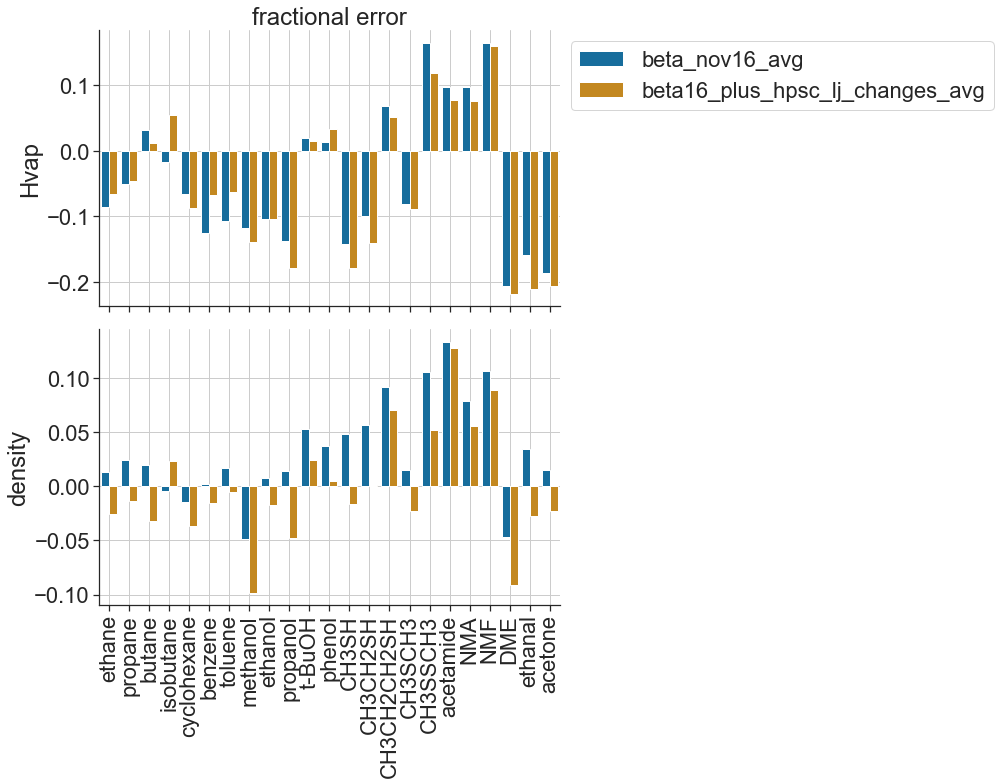

In [10]:
molecules = [
    'ethane', 'propane', 'butane', 'isobutane', 'cyclohexane',
    'benzene', 'toluene',
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH', 'CH3SCH3', 'CH3SSCH3',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone'
]
#molecules = [f'{molecule}_Ra' for molecule in molecules]
e_functions = [
    #'beta_nov16',
    #'beta_nov16_r2',
    #'beta_nov16_r3',
    'beta_nov16_avg',
    'beta16_plus_hpsc_lj_changes_avg',
    #'HH_run18_guess12',
    #'HH_run18_guess13',
    #'HH_run18_guess14',
    #'HH_run18F_434_mod2h',
    #'HH_run18F_434_mod5a',
    #'HH_run18F_434_mod5b',
    #'HH_run18F_434_mod5c',
    #'HH_run18F_434_mod5d',
    #'HH_run18F_434_mod5e',
    #'HH_run18F_434_mod5f',
    #'HH_run18F_434_mod5h',
    #'HH_run18F_434_mod5k',
    #'HH_run18F_434_mod5l',
    #'HH_run18F_434_mod5m',
    #'HH_run18F_434_mod5n',
    #'HH_run18F_434_mod5o',
    #'HH_run18F_434_mod5p',
    
    #'HH_run18F_434_mod6f',
    #'HH_run18F_434_mod6g',
    #'HH_run18F_434_mod6h',
    
    #'HH_run18F_434_mod6l',
    #'HH_run18F_434_mod6o',
    #'HH_run18F_434_mod6p',
    #'HH_run18F_434_mod6q',
    #'HH_run18F_434_mod6r',
    #'HH_run18F_434_mod6s',
    #'HH_run18F_434_mod7j',
    #'HH_run18F_434_mod7j_r2',
    #'HH_run18F_434_mod7j_r3',
    #'HH_run18F_434_mod7j_avg',

    #'HH_run25B_step311_avg',
    #'HH_run25B_step311_1e_avg',
    # 'HH_run26B_step129_1e_avg',
]
(fig, axs) = plt.subplots(
    nrows=2, sharex=True, figsize=[14,11]
)
for (i, metric) in enumerate(['Hvap', 'density']):
    g = sns.barplot(
        y=f'frac_error_{metric}', x='molecule',
        hue='e_function', order=molecules,
        data=est_df, ax=axs[i], hue_order=e_functions
    )
    if i == 1:    
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
        axs[i].get_legend().remove()
        #axs[i].set(ylim=[-0.1, 0.1])
    else:
        axs[i].legend(bbox_to_anchor=(1,1))
        axs[i].set(title='fractional error')
    axs[i].set(xlabel='', ylabel=metric)
    axs[i].grid()

plt.tight_layout()
sns.despine()
plt.show()

**Observations**
* Are the results for beta_nov16 roughly in line with what Hahnbeom reported in his paper?
    * group 1 (alkanes): yes
    * group 2 (aromatics): yes (phenol still TBD)
    * group 3 (alcohols): pretty close, though Hvap is worse in my case
    * group 4 (sulfur-containing): yes, except for CH3SSCH3
    * group 5: TBD
    * group 6: TBD

* guess12 and 2h have same params for aliphatics
* lowering CH1_e helps with isobutane
* increasing Hapo_e helps with cyclohexane; hurts with butane and isobutane

In [12]:
e_functions = [
    # 'beta_nov16_avg',
    # 'beta16_plus_hpsc_lj_changes_avg',
    #'HH_run18_guess12',
    #'HH_run18_guess13',
    #'HH_run18_guess14',
    'HH_run18F_434_mod2h',
    'HH_run18F_434_mod7j',

    'HH_run18F_434_mod6f',
    'HH_run18F_434_mod6g',
    #'HH_run18F_434_mod6h',
    #'HH_run18F_434_mod6l',
    'HH_run18F_434_mod6o',
    #'HH_run18F_434_mod6p',
    #'HH_run18F_434_mod6q',
    #'HH_run18F_434_mod6r',
    #'HH_run18F_434_mod6s',
    #'HH_run18F_434_mod7a',
    
]
atoms = [
    #'CH1', 'CH2', 'CH3', 'Hapo',
    'aroC', 'Haro',
    'OH', 'CHR1' #'Hapo', 'CH3', 'CH2',
    #'S', 'SH1', 'HS',# 'Hapo', 'CH3', 'CH2',
    #'CHR1', 'CHR2',
    #'OOC'#, 'ONH2'
]
params = [f'{atom}_r' for atom in atoms]
params += [f'{atom}_e' for atom in atoms]
params_dict = {
    key : []
    for key in ['e_function'] + params
}
for e_function in e_functions:

    # Get params from flags file
    flags_f = os.path.join(
        '/home/haddox/2019/optE_eval/data/',
        e_functions_dict[e_function][1]
    )
    with open(flags_f) as f:
        lines = f.readlines()
    r_dict = {}
    e_dict = {}
    for line in lines:
        items = line.strip().split(':')
        if len(items) < 3:
            continue
        if items[-2] == 'LJ_RADIUS':
            r_dict[items[-3]] = float(items[-1])
        elif items[-2] == 'LJ_WDEPTH':
            e_dict[items[-3]] = float(items[-1])

    # Record atom-specific params
    params_dict['e_function'].append(e_function)
    for atom in atoms:
        params_dict[f'{atom}_r'].append(r_dict[atom])
        params_dict[f'{atom}_e'].append(e_dict[atom])

params_df = pandas.DataFrame(params_dict)
params_df.set_index('e_function', inplace=True)
params_df#.drop_duplicates()

aroC_r  Haro_r     OH_r   CHR1_r  aroC_e  Haro_e  \
e_function                                                              
HH_run18F_434_mod2h   2.045    1.40  1.61613  1.89316   0.075   0.023   
HH_run18F_434_mod7j   2.040    1.43  1.59613  1.83316   0.075   0.024   
HH_run18F_434_mod6f   2.040    1.43  1.59613  1.83316   0.075   0.024   
HH_run18F_434_mod6g   2.040    1.43  1.59613  1.83316   0.075   0.024   
HH_run18F_434_mod6o   2.040    1.43  1.59613  1.83316   0.075   0.024   

                        OH_e   CHR1_e  
e_function                             
HH_run18F_434_mod2h  0.16813  0.08333  
HH_run18F_434_mod7j  0.18813  0.08333  
HH_run18F_434_mod6f  0.16813  0.08333  
HH_run18F_434_mod6g  0.18813  0.08333  
HH_run18F_434_mod6o  0.18813  0.08333

**Observations**
Consolidating params into best energy functions
* aliphatics:
    * guess 12, 2h, 5a, 5o, 5p, 6f
* aromatics: params from guess 14
    * guess 14, 6f, 2h
* alcohols
    * 5f, 5c, 5e, 6f
* sulfur-containing molecules
    * 5e, 5d, guess 14, 6f

* 6g:
    * increased:
        * OH well depth to levels of 5e and 5f
        * CH1 radius
    * decreased:
        * CH1 well depth
        * S/SH well depth to original val
* 6h:
    * same as 6g, but with C/H/aro(?) LJ params taken from 2h
    

To do:
* see if these params match what already have
* look at distance distributions from PPI test

Show the average error across a set of molecules

In [13]:
metrics = ['frac_error_Hvap', 'frac_error_density']
frac_error_dict = {
    key : []
    for key in ['e_function'] + metrics
}
molecules = [
    #'ethane', 'propane', 'butane', 'isobutane', 'cyclohexane',
    #'benzene', 'toluene', 'phenol'
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    #'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH', 'CH3SCH3', 'CH3SSCH3',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone'
]
#molecules = [f'{molecule}_Ra' for molecule in molecules]
#molecules = []
molecules += [
    'ethane', 'propane', 'butane', 'isobutane', 'cyclohexane',
    'benzene', 'toluene',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH', 'CH3SCH3', 'CH3SSCH3',
]
print(len(molecules))
print(molecules)
e_functions = [
    #'beta_nov16',
    #'beta_nov16_r2',
    #'beta_nov16_r3',
    'beta_nov16_avg',
    'beta16_plus_hpsc_lj_changes_avg',
    #'HH_run18_guess12',
    #'HH_run18_guess14',
    #'HH_run18F_434_mod2h',
    #'HH_run18F_434_mod6f',
    #'HH_run18F_434_mod6g',
    #'HH_run18F_434_mod6l',
    #'HH_run18F_434_mod6o',
    #'HH_run18F_434_mod6p',
    #'HH_run18F_434_mod6q',
    #'HH_run18F_434_mod6r',
    #'HH_run18F_434_mod6s',
    #'HH_run18F_434_mod7j',
    #'HH_run18F_434_mod7j_r2',
    #'HH_run18F_434_mod7j_r3',
    ##'HH_run18F_434_mod7j_avg',
    ##'HH_run25B_step311_avg',
    ##'HH_run26B_step129_1e_avg',
]

for e_function in e_functions:
    frac_error_dict['e_function'].append(e_function)
    for metric in metrics:
        data = est_df[
            (est_df['molecule'].isin(molecules)) &
            (est_df['e_function'] == e_function)
        ].copy()
        data['abs_frac_error'] = data[metric].apply(abs)
        assert sum(data['abs_frac_error'].isnull()) == 0, metric
        frac_error_dict[metric].append(data['abs_frac_error'].mean())
        print(e_function, metric, len(data))
        
frac_error_df = pandas.DataFrame(frac_error_dict)
frac_error_df#.sort_values('frac_error_Hvap')

23
['methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol', 'acetamide', 'NMA', 'NMF', 'DME', 'ethanal', 'acetone', 'ethane', 'propane', 'butane', 'isobutane', 'cyclohexane', 'benzene', 'toluene', 'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH', 'CH3SCH3', 'CH3SSCH3']
beta_nov16_avg frac_error_Hvap 23
beta_nov16_avg frac_error_density 23
beta16_plus_hpsc_lj_changes_avg frac_error_Hvap 23
beta16_plus_hpsc_lj_changes_avg frac_error_density 23


e_function  frac_error_Hvap  frac_error_density
0                   beta_nov16_avg         0.101973            0.042897
1  beta16_plus_hpsc_lj_changes_avg         0.104123            0.040096

Plot results of trajectories

simulation step: True


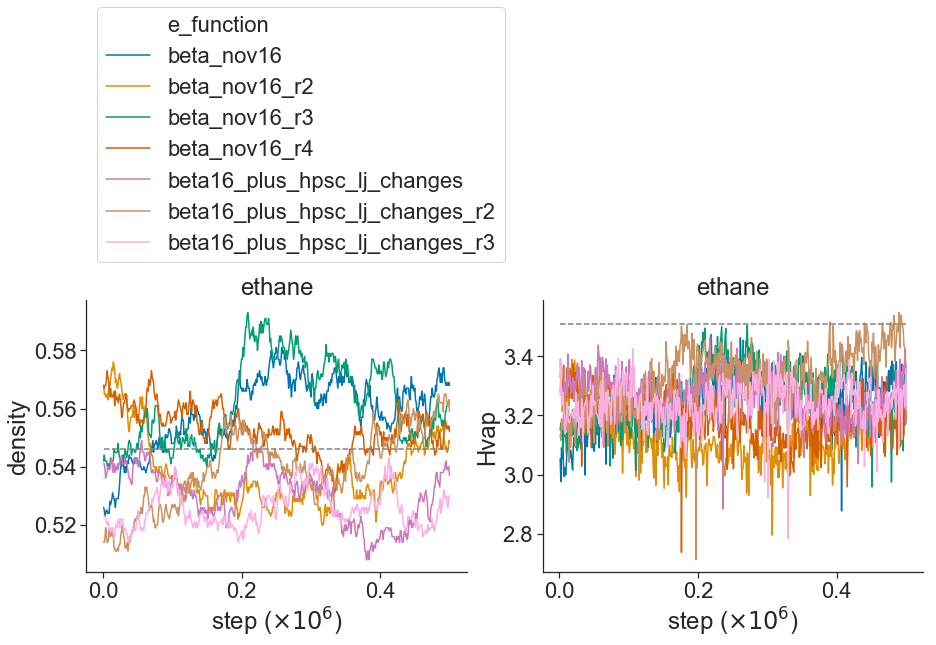

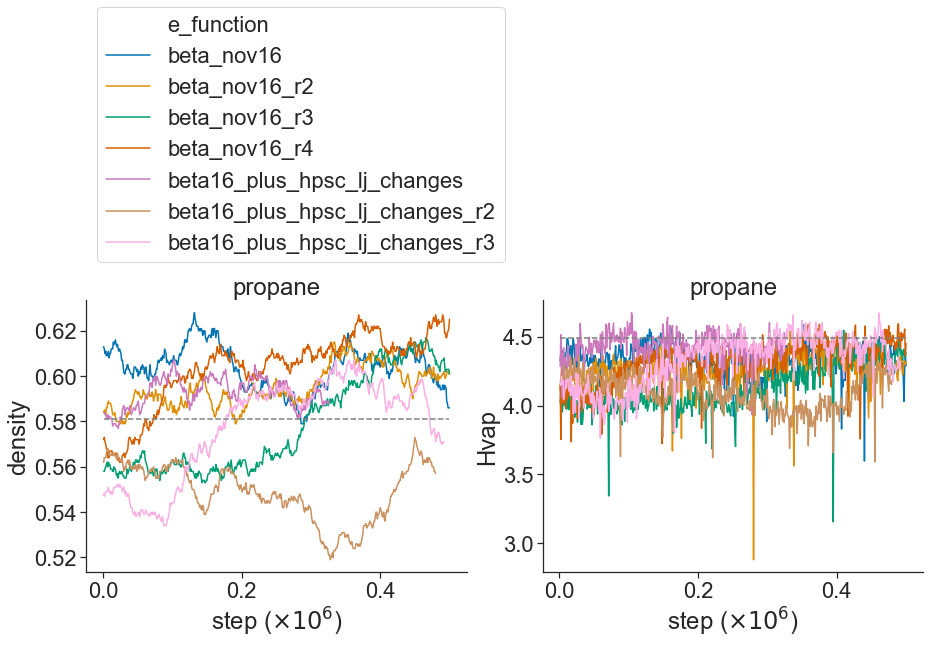

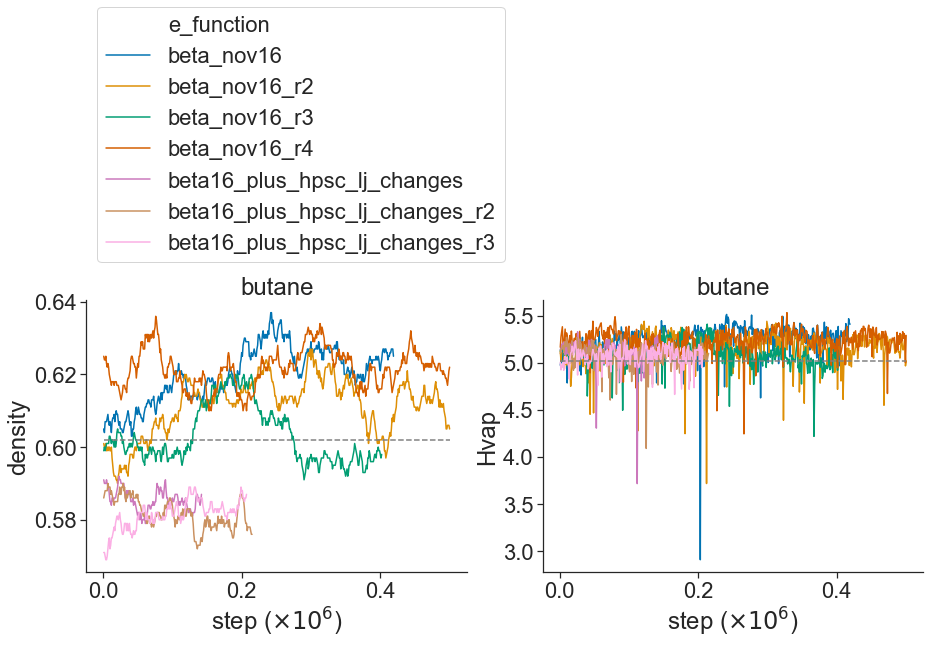

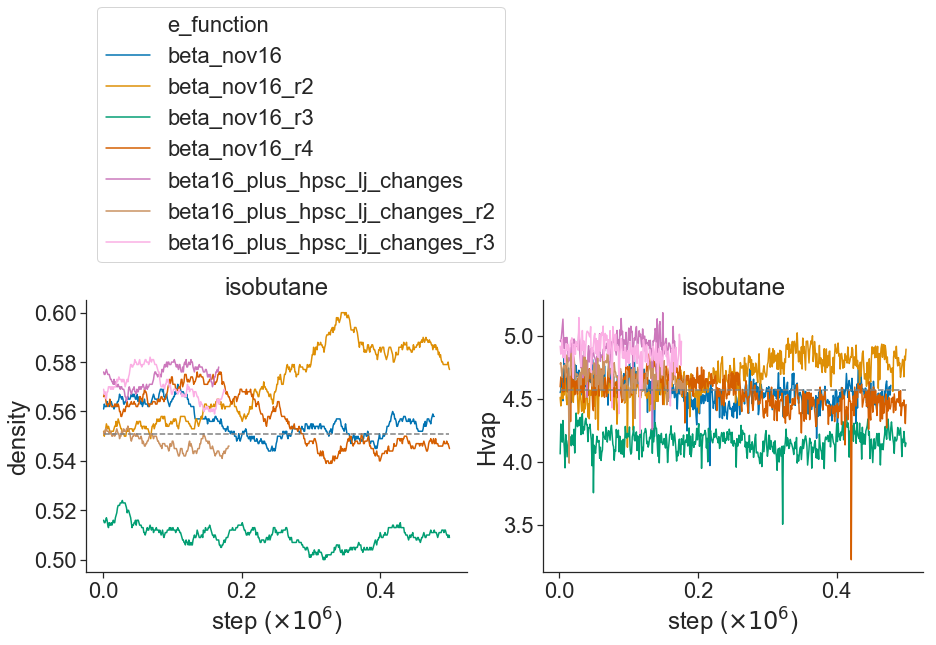

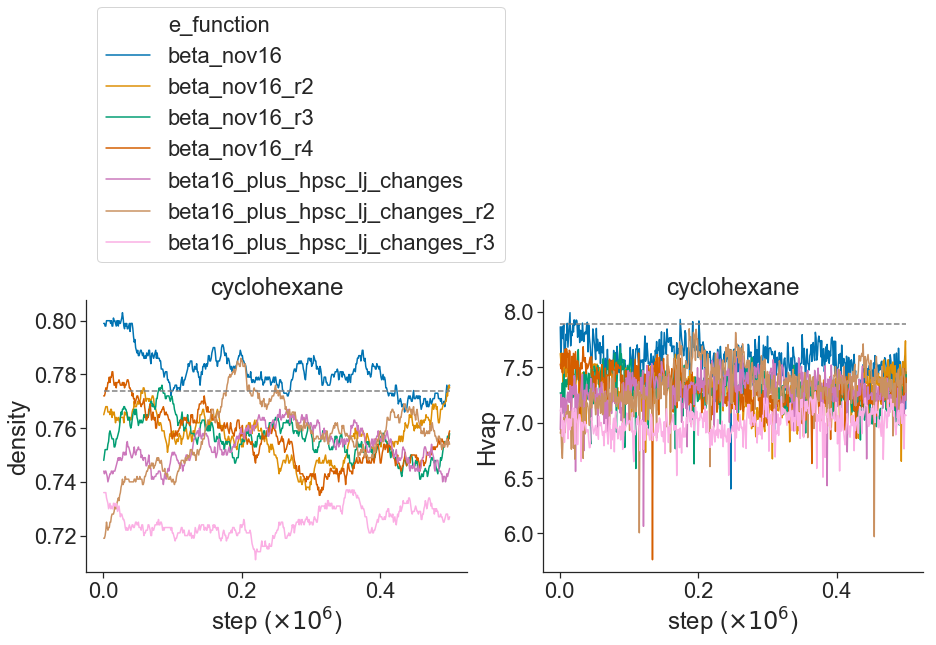

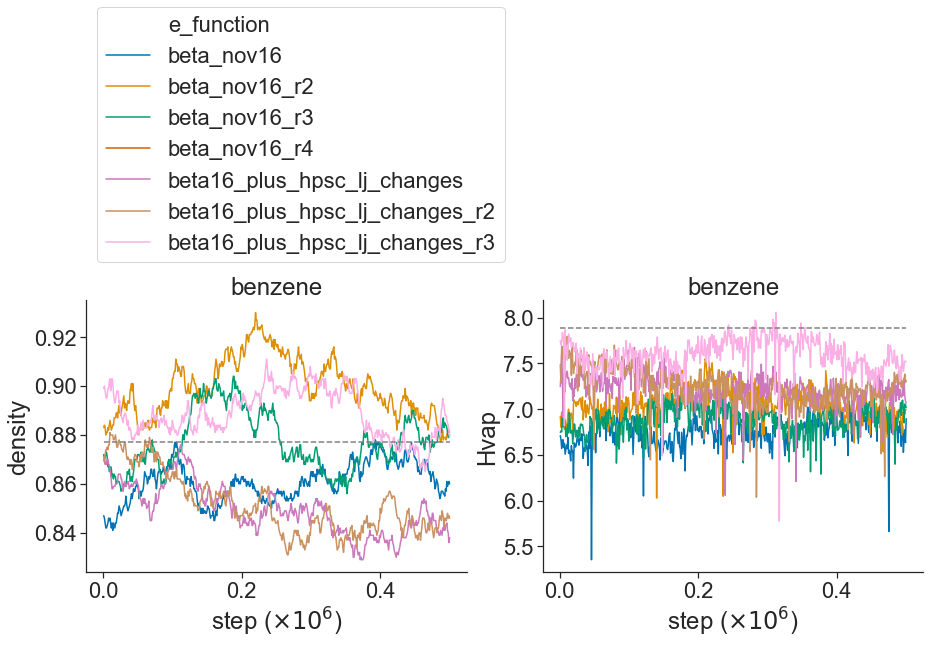

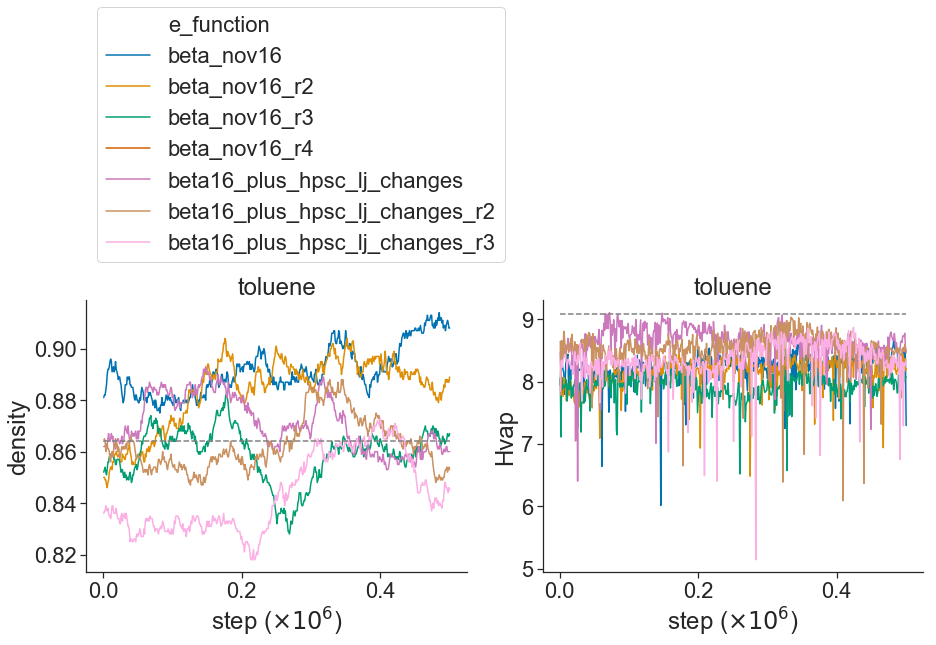

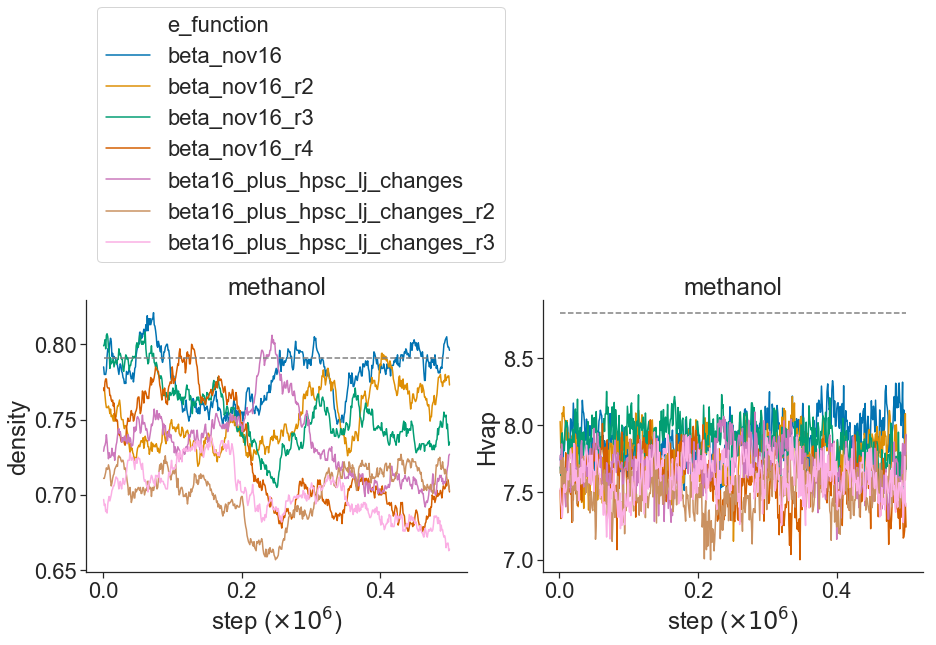

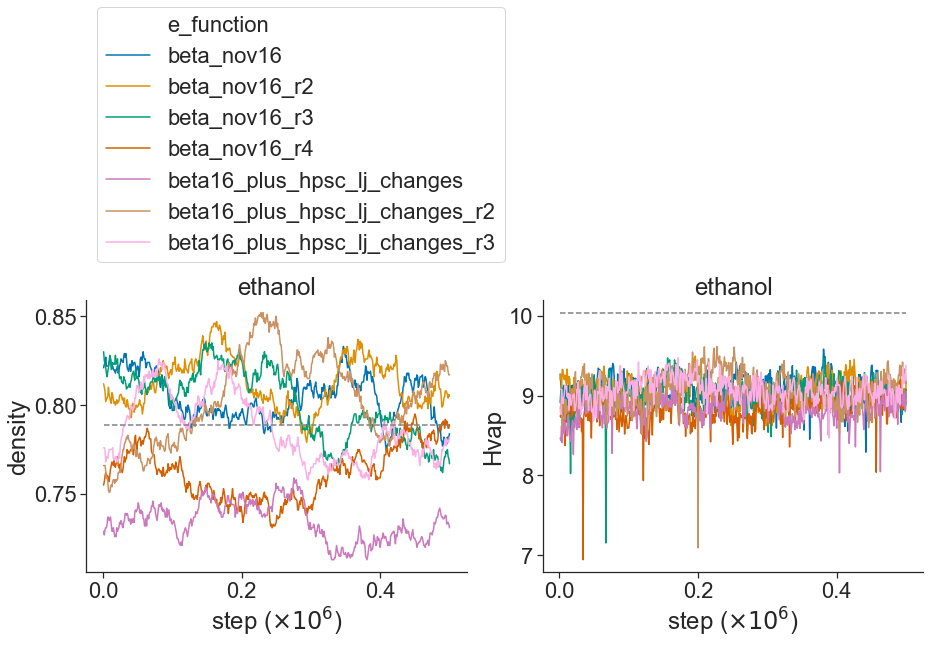

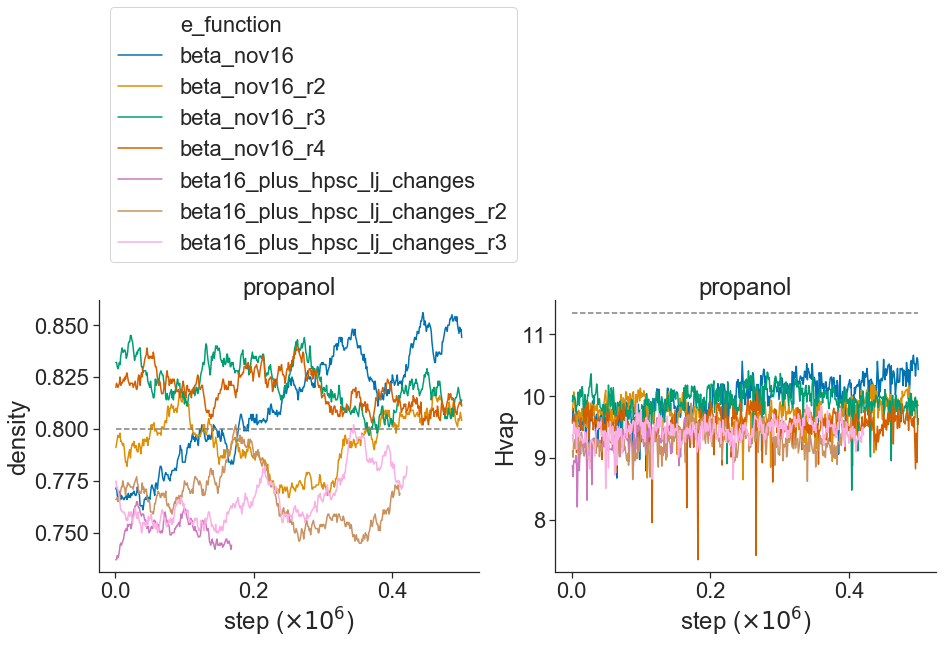

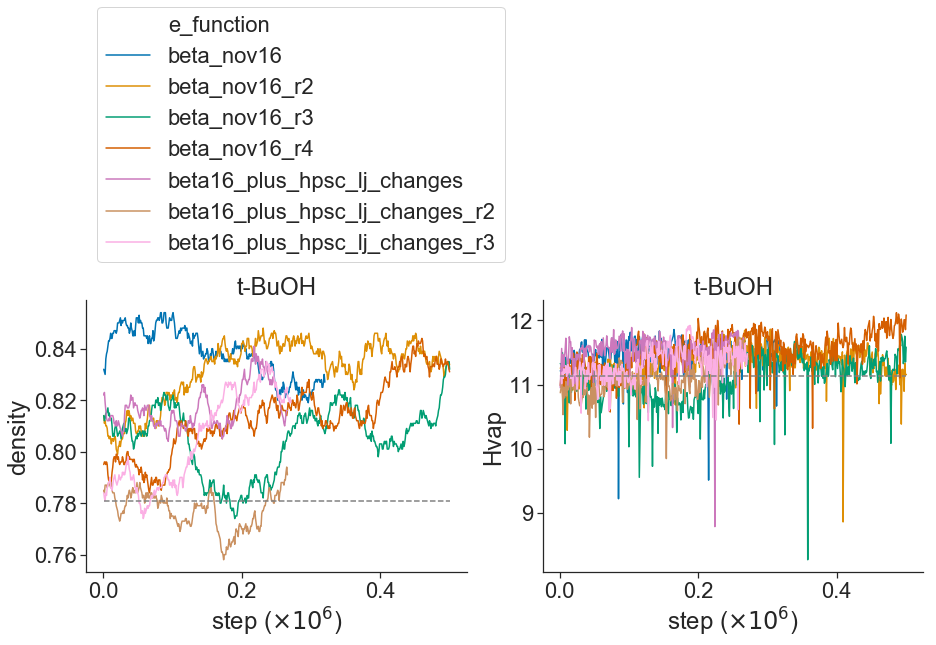

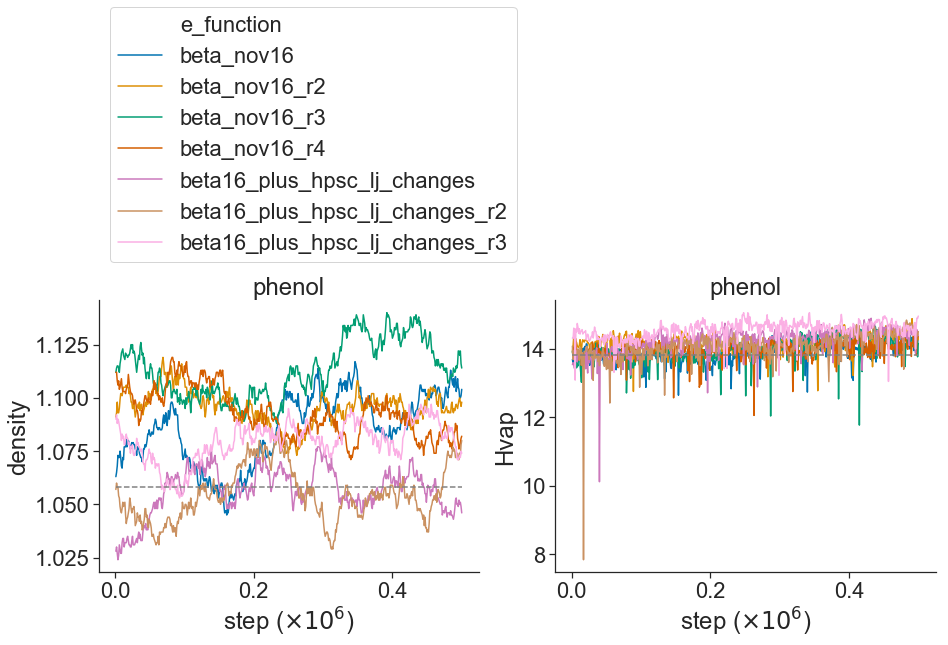

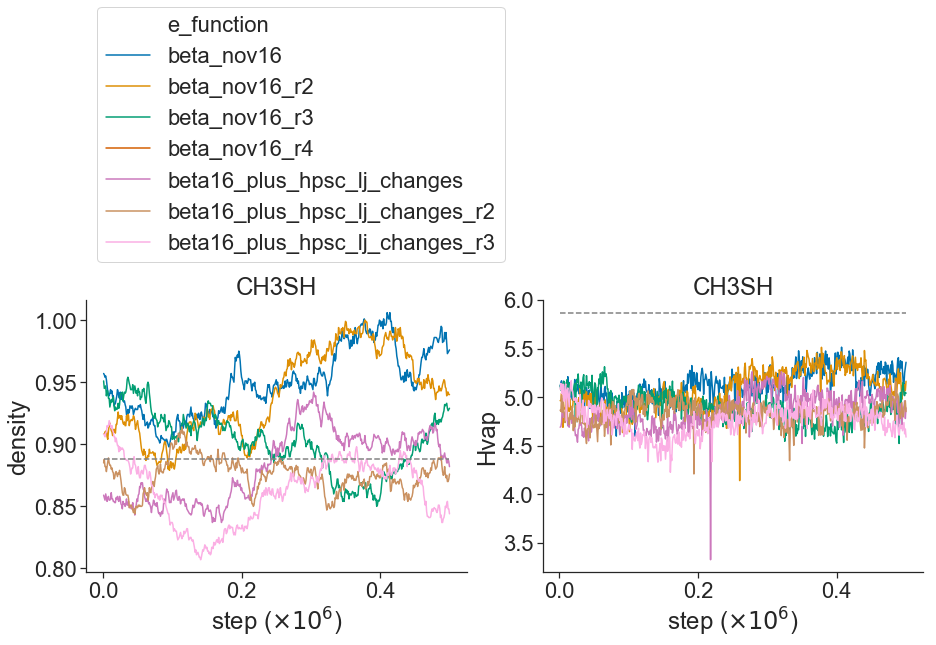

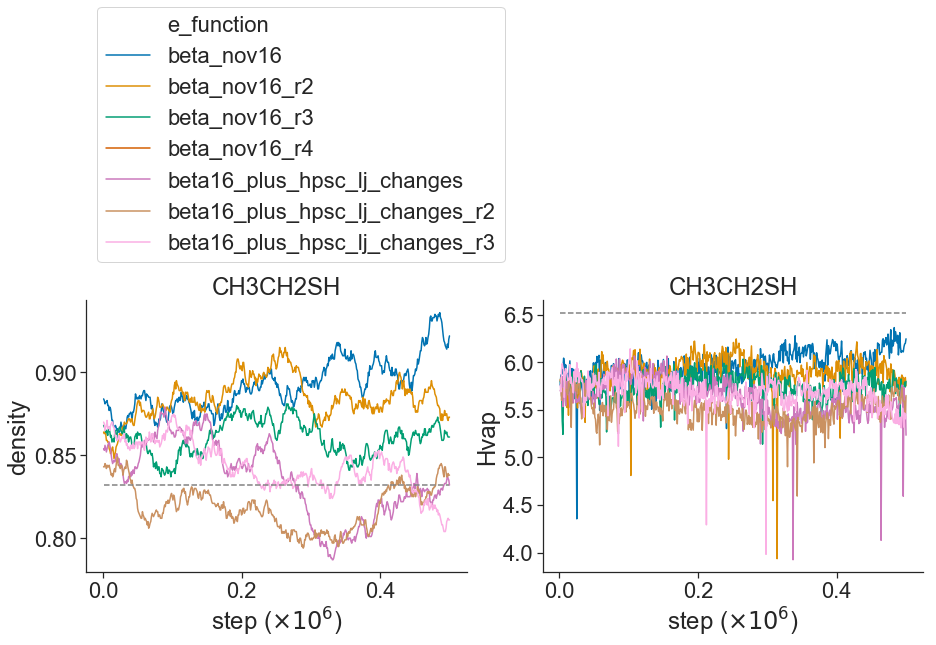

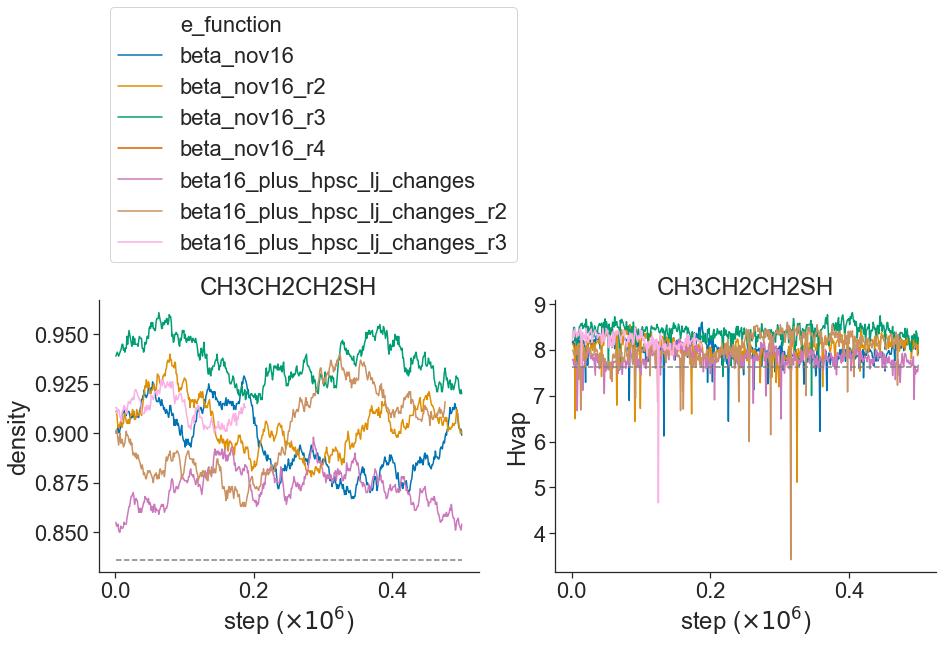

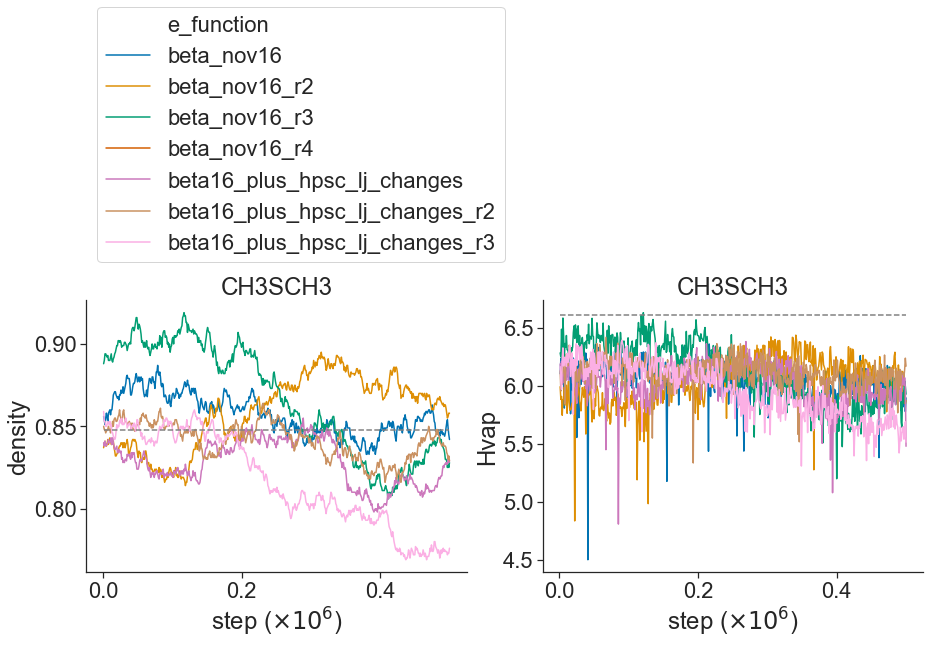

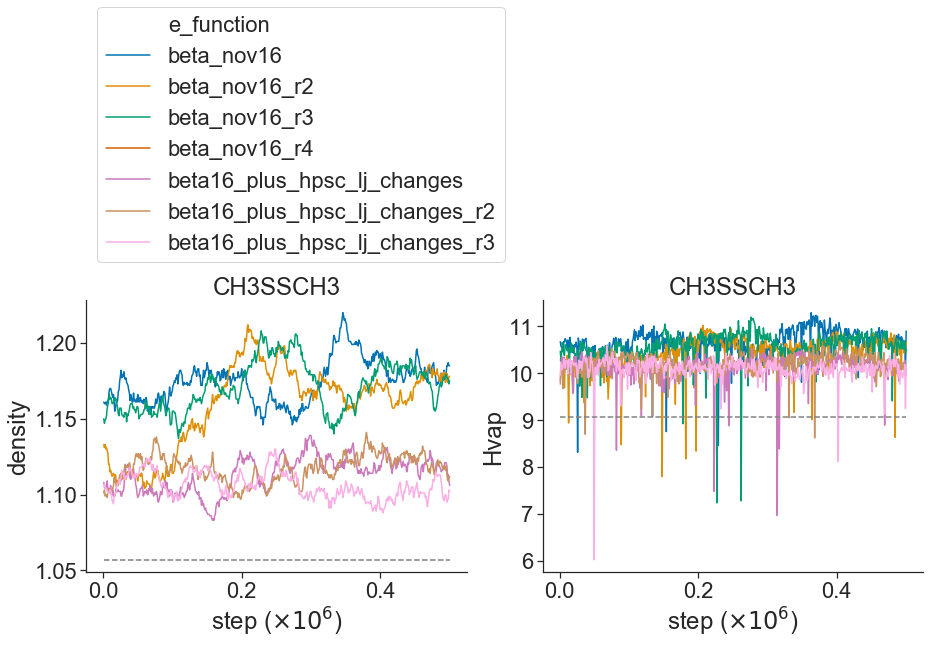

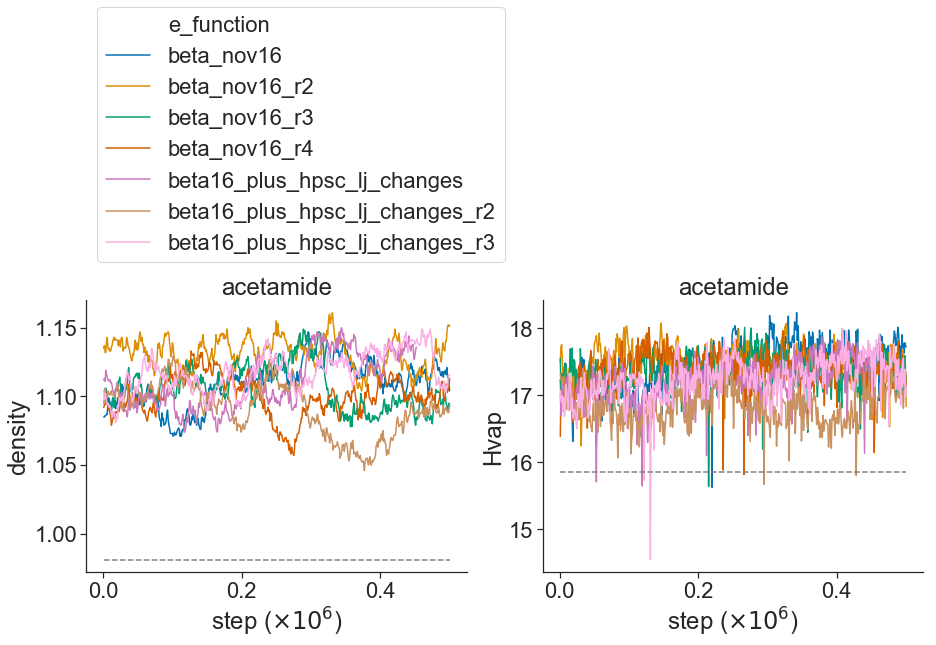

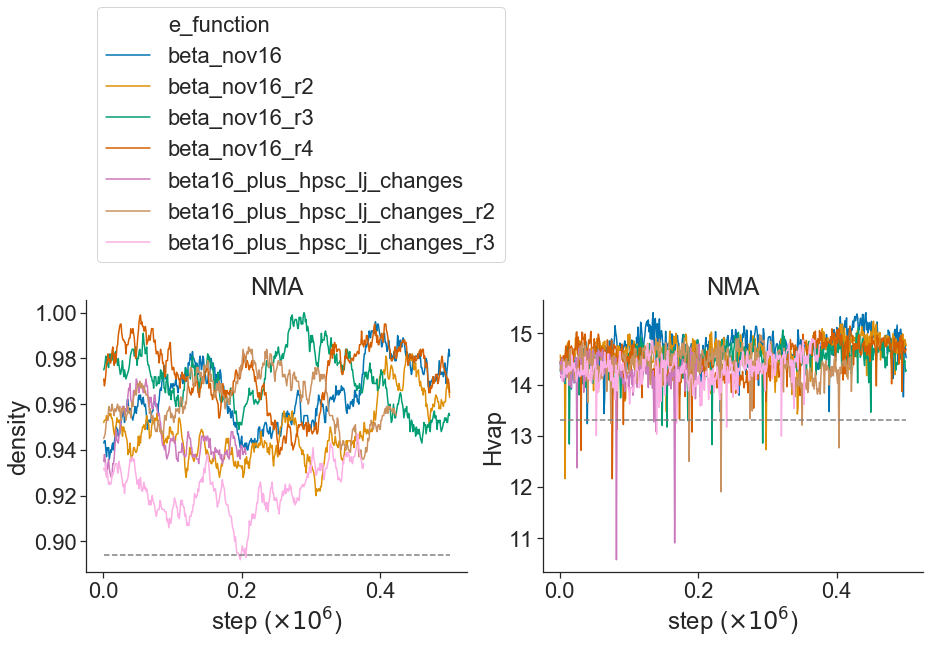

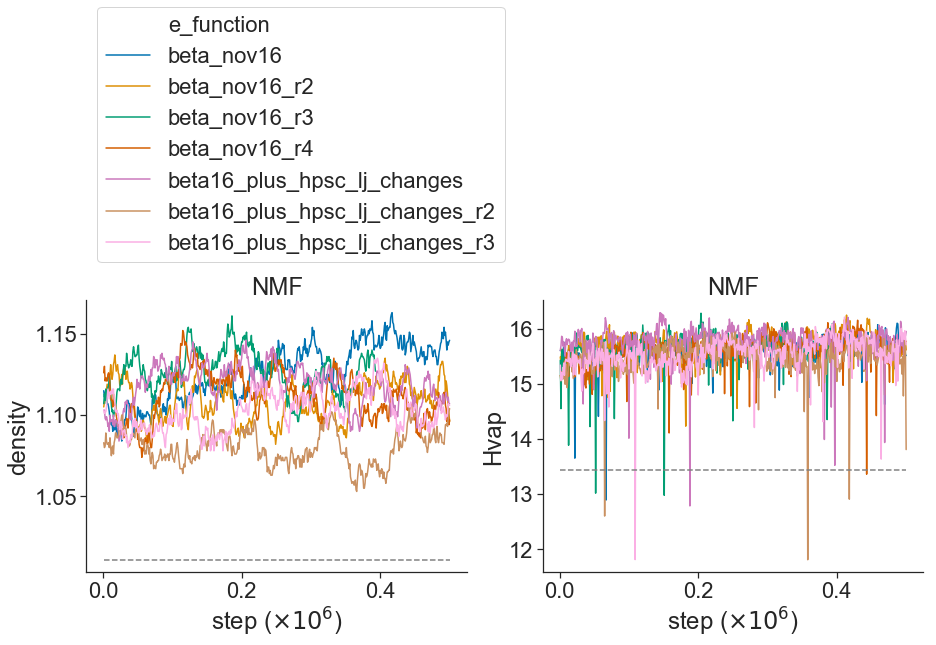

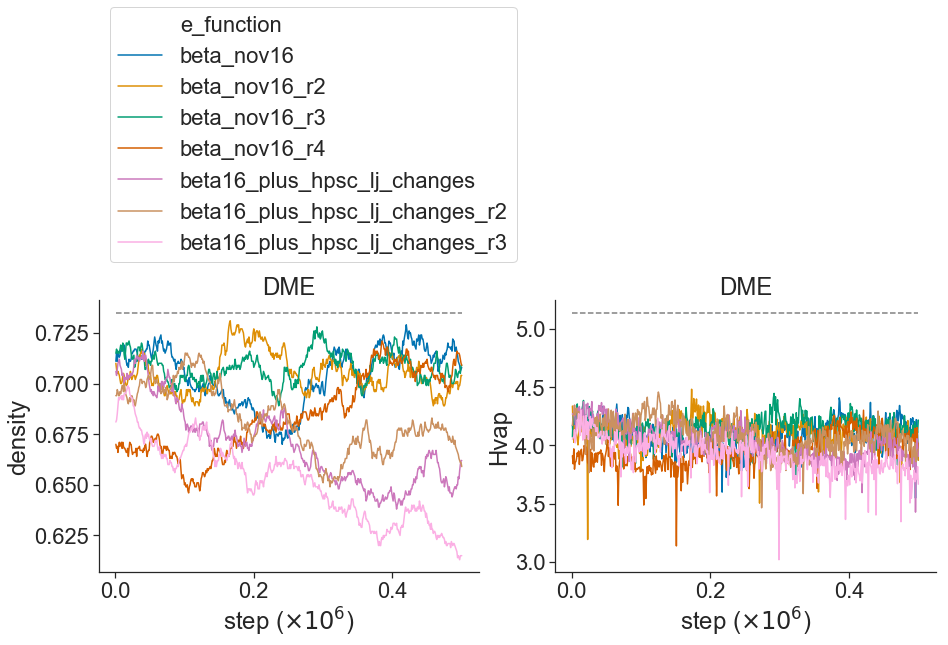

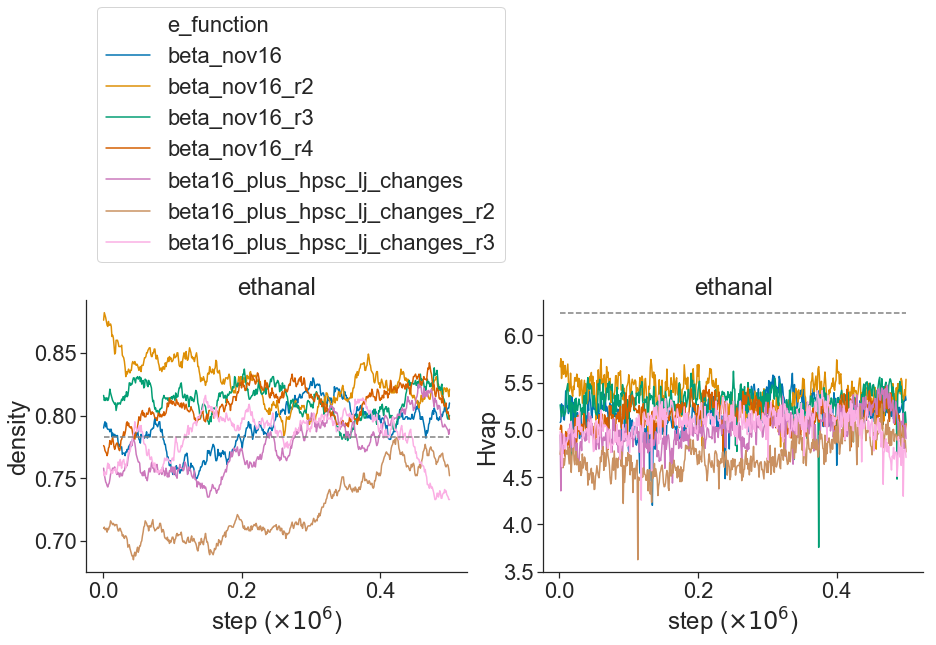

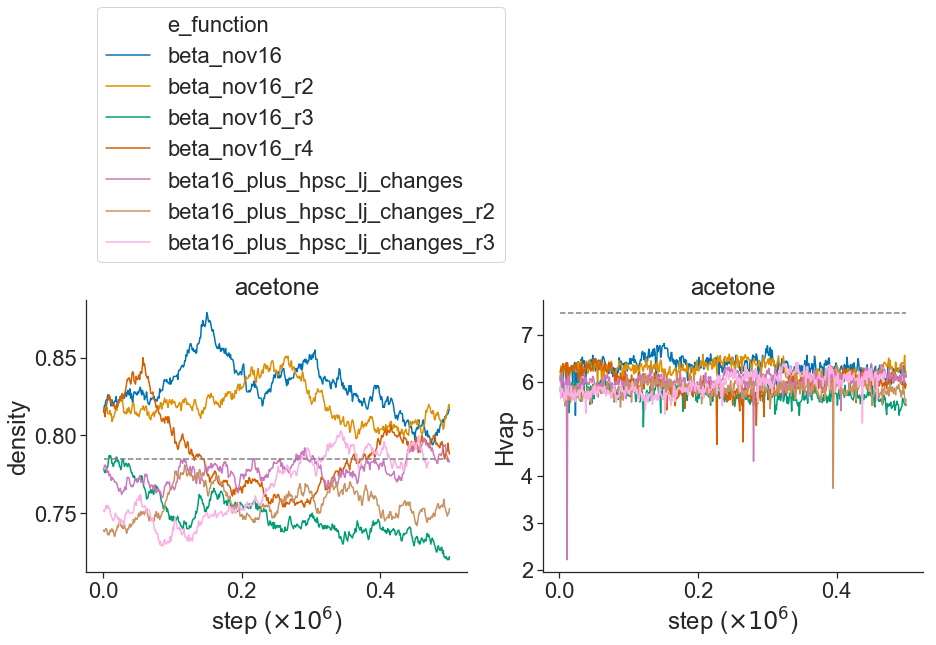

In [16]:
# Plot data for each molecule
e_functions_to_plot = [
    'beta_nov16',
    'beta_nov16_r2',
    'beta_nov16_r3',
    'beta_nov16_r4',
    
    'beta16_plus_hpsc_lj_changes',
    'beta16_plus_hpsc_lj_changes_r2',
    'beta16_plus_hpsc_lj_changes_r3',
    #'beta_nov16_fixed',
    #'beta_nov16_fullrep'
    #'HH_run18C_step286',
    #'HH_run18_guess6', #'HH_run18_guess6_fixed',
    #'HH_run18_guess7', 'HH_run18_guess8',
    #'HH_run18_guess9', #'HH_run18_guess10',
    #'HH_run18_guess11',
    #'HH_run18_guess12',
    #'HH_run18_guess13',
    #'HH_run18_guess14',
    #'HH_run18_guess15',
    #'HH_run18F_434_mod2d',
    #'HH_run18F_434_mod2e',
    #'HH_run18F_434_mod2h',
    #'HH_run18F_434_mod5a',
    #'HH_run18F_434_mod5b',
    #'HH_run18F_434_mod5c',
    #'HH_run18F_434_mod5d',
    #'HH_run18F_434_mod5e',
    #'HH_run18F_434_mod5f',
    #'HH_run18F_434_mod5h',
    #'HH_run18F_434_mod5i',
    #'HH_run18F_434_mod5j',
    #'HH_run18F_434_mod5k',
    #'HH_run18F_434_mod5l',
    #'HH_run18F_434_mod5m',
    #'HH_run18F_434_mod5n',
    #'HH_run18F_434_mod5o',
    #'HH_run18F_434_mod5p',
    #'HH_run18F_434_mod6f',
    #'HH_run18F_434_mod6g',
    #'HH_run18F_434_mod6h',
    #'HH_run18F_434_mod6i',
    #'HH_run18F_434_mod6j',
    #'HH_run18F_434_mod6k',
    #'HH_run18F_434_mod6l',
    #'HH_run18F_434_mod6o',
    #'HH_run18F_434_mod6p',
    #'HH_run18F_434_mod6q',
    #'HH_run18F_434_mod6r',
    #'HH_run18F_434_mod6s',
    
    #'HH_run18F_434_mod7j',
    #'HH_run18F_434_mod7j_r2',
    #'HH_run18F_434_mod7j_r3',
 
    # Old e functions turned on
    # 'HH_run25B_step311',
    # 'HH_run25B_step311_r2',
    # 'HH_run25B_step311_r3',
    
#     'HH_run26B_step129_1e',
#     'HH_run26B_step129_1e_r2',
#     'HH_run26B_step129_1e_r3',
]
molecules = [
    'ethane', 'propane',
    'butane',
    'isobutane', 'cyclohexane',
    'benzene', 'toluene',
    'methanol', 'ethanol', 'propanol', 't-BuOH', 'phenol',
    'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH',
    'CH3SCH3', 'CH3SSCH3',
    'acetamide', 'NMA', 'NMF',
    'DME', 'ethanal', 'acetone'
]
# molecules = [
#     'ethane', 'propane',
#     'butane',
#     'isobutane', 'cyclohexane',
#     'benzene', 'toluene',
#     'methanol',
#     'methanol_Ra', 'methanol_Rb',
#     'ethanol',
#     'ethanol_Ra', 'ethanol_Rb',
#     'propanol',
#     'propanol_Ra', 'propanol_Rb',
#     't-BuOH',
#     't-BuOH_Ra', 't-BuOH_Rb',
#     'phenol',
#     'phenol_Ra', 'phenol_Rb',
#     'CH3SH', 'CH3CH2SH', 'CH3CH2CH2SH',
#     'CH3SCH3', 'CH3SSCH3',
#     'acetamide',
#     'acetamide_Ra',
#     'NMA',
#     'NMA_Ra', 'NMA_Rb',
#     'NMF',
#     'NMF_Ra', 'NMF_Rb',
#     'DME',
#     'DME_Ra', 'DME_Rb',
#     'ethanal',
#     'ethanal_Ra',
#     'acetone',
#     'acetone_Ra',
# ]

simulation_step = True
print(f"simulation step: {simulation_step}")
for molecule in molecules:
    
    # Get data for molecule
    data = scores_df[
        (scores_df['molecule'] == molecule) &
        (scores_df['simulation_step'] == simulation_step)
    ].copy()
    if not simulation_step:
        data = data[data['step'] >= 1e-2]
    if len(data) == 0:
        continue
    
    # Plot data
    (fig, axs) = plt.subplots(
        ncols=2, sharex=True, figsize=[15,5]
    )
    
    # ... for density
    sns.lineplot(
        x='step', y='density', data=data, hue='e_function',
        ax=axs[0],
        hue_order=e_functions_to_plot
    )
    evp_val = float(exp_df[exp_df['molecule'] == molecule]['density'])
    axs[0].plot(
        [data['step'].min(), data['step'].max()],
        [evp_val, evp_val], ls='--', c='0.5'
    )
    axs[0].set(
        xlabel=r'step ($\times 10^6$)', ylabel='density',
        title=molecule
    )
    axs[0].legend(
        bbox_to_anchor=(0., 1.1, 1., .102),
        ncol=1
    )
    
    # ... and heat of vaporization
    sns.lineplot(
        x='step', y='Hvap', data=data, hue='e_function',
        ax=axs[1],
        hue_order=e_functions_to_plot
    )
    evp_val = float(exp_df[exp_df['molecule'] == molecule]['Hvap'])
    axs[1].plot(
        [data['step'].min(), data['step'].max()],
        [evp_val, evp_val], ls='--', c='0.5'
    )
    axs[1].set(
        xlabel=r'step ($\times 10^6$)', ylabel='Hvap',
        title=molecule
    )
    axs[1].get_legend().remove()
    
    sns.despine()
    plt.show()

In [21]:
data[
    (data['e_function'] == 'beta_nov16_r4') &
    (data['step'] > 0.1)
][[
    'e_function', 'step', 'density',
    'simulation_step', 'description',
]].sort_values('step').head()

e_function   step  density  simulation_step      description
4191  beta_nov16_r4  0.101    0.561             True  simulate_101000
4208  beta_nov16_r4  0.101    0.527             True  simulate_101000
4193  beta_nov16_r4  0.102    0.561             True  simulate_102000
4210  beta_nov16_r4  0.102    0.526             True  simulate_102000
4195  beta_nov16_r4  0.103    0.559             True  simulate_103000

**Questions:**
* cyclohexane off due to dielectric constant being higher?
    * could do a run and increase the dielectric constant

**Observations**:
* sims are failing for following molecules, probably because params files don't match
    * t-BuOH, phenol

## Use snapshots to estimate density and Hvap

Use snapshots to quickly estimate the density and heat of vaporization of a given energy function and molecule. First, score each set of snapshots with each energy function.

In [60]:
# Define input variables
score_app_path = '/home/haddox/Rosetta/main/source/bin/score.default.linuxgccrelease'

# Cycle through energy functions and score snapshots
e_functions = [
    'beta_nov16',
    'HH_run18C_step286',
    'HH_run18_guess12',
    'HH_run18_guess14',
    'HH_run18F_434_mod2h',
    'HH_run18F_434_mod5a',
    'HH_run18F_434_mod5b',
    'HH_run18F_434_mod5c',
    'HH_run18F_434_mod5d',
    'HH_run18F_434_mod5e',
    'HH_run18F_434_mod5f',
    'HH_run18F_434_mod5h',
    'HH_run18F_434_mod5i',
    'HH_run18F_434_mod5j',
    'HH_run18F_434_mod5k',
    'HH_run18F_434_mod5l',
    'HH_run18F_434_mod5m',
    'HH_run18F_434_mod5n',
    'HH_run18F_434_mod5o',
    'HH_run18F_434_mod5p',
]

molecules = [
    'ethane', 'propane', 'butane', 'isobutane',
    'cyclohexane',
    #'benzene', 'toluene'
]
rescoring_files_dict = {
    key : []
    for key in e_functions
}
for e_function in e_functions:
    weights_file = os.path.join(
        'data/liquid_sim_weights_files/',
        e_functions_dict[e_function][0]
    )
    flags_file = os.path.join(
        '/home/haddox/2019/optE_eval/data/',
        e_functions_dict[e_function][1]
    )

    # Cycle over molecules and score snapshots for each one
    for molecule in molecules:

        # Get the input params file for the current molecule
        params_file = f'data/{molecule}/LG.params'
        
        # Cycle over energy functions used to simulate the
        # current small molecule and score snap shots from
        # each using the current energy function for scoring
        for sim_e_function in e_functions:
            sim_dir = os.path.join(
                'results/four_by_four_sim2/',
                sim_e_function,
                molecule
            )
            silent_file = os.path.join(
                sim_dir,
                'prod.out'
            )
            if not os.path.isfile(silent_file):
                continue
            output_dir = os.path.join(
                sim_dir,
                'rescoring_snapshots/'
            )
            if not os.path.isdir(output_dir):
                os.makedirs(output_dir)
            output_file = os.path.join(
                output_dir,
                f'{molecule}.{e_function}.sc'
            )
            rescoring_files_dict[e_function].append(output_file)
            
            cmd = ' '.join([
                score_app_path,
                f'-in:file:silent {silent_file}',
                '-in:file:fullatom',
                '-symmetry_definition dummy',
                '@data/flags.liquidsim',
                f'@{flags_file}',
                f'-score:weights {weights_file}',
                '-score:grpelec_fade_type grpsubtract',
                '-score:elec_r_option true',
                '-score:elec_max_dis 6.0',
                '-score:fa_max_dis 6.0',
                f'-extra_res_fa {params_file}',
                f'-out:file:scorefile {output_file}'
            ])

            sbatch_file = output_file.replace('.sc', '.sbatch')
            if not os.path.isfile(sbatch_file):
                print(sbatch_file)
                design_utils.WriteSbatchFile(
                    sbatch_file,
                    command=cmd,
                    queue_type='old',
                    memory='2g'
                )
                ! sbatch {sbatch_file}

results/four_by_four_sim2/beta_nov16/ethane/rescoring_snapshots/ethane.HH_run18F_434_mod5o.sbatch
Submitted batch job 17270823
results/four_by_four_sim2/HH_run18C_step286/ethane/rescoring_snapshots/ethane.HH_run18F_434_mod5o.sbatch
Submitted batch job 17270824
results/four_by_four_sim2/HH_run18_guess12/ethane/rescoring_snapshots/ethane.HH_run18F_434_mod5o.sbatch
Submitted batch job 17270825
results/four_by_four_sim2/HH_run18_guess14/ethane/rescoring_snapshots/ethane.HH_run18F_434_mod5o.sbatch
Submitted batch job 17270826
results/four_by_four_sim2/HH_run18F_434_mod2h/ethane/rescoring_snapshots/ethane.HH_run18F_434_mod5o.sbatch
Submitted batch job 17270827
results/four_by_four_sim2/HH_run18F_434_mod5a/ethane/rescoring_snapshots/ethane.HH_run18F_434_mod5o.sbatch
Submitted batch job 17270828
results/four_by_four_sim2/HH_run18F_434_mod5b/ethane/rescoring_snapshots/ethane.HH_run18F_434_mod5o.sbatch
Submitted batch job 17270829
results/four_by_four_sim2/HH_run18F_434_mod5c/ethane/rescoring_sn

Check the correlation between scores from the simulation and the rescored decoys

N =  50


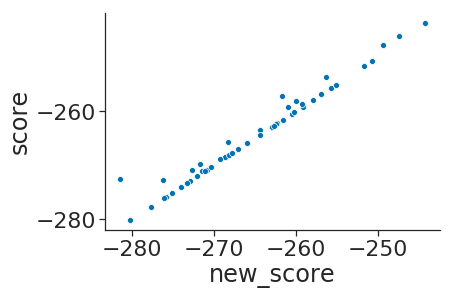

In [61]:
input_dir = 'results/four_by_four_sim2/beta_nov16/ethane/'
sc_f = os.path.join(input_dir, 'prod.sc')
ss_f = os.path.join(input_dir, 'rescoring_snapshots/ethane.beta_nov16.sc')

sc_df = pandas.read_csv(sc_f, sep='\s+')
sc_df['pdb'] = sc_df['description']

ss_df = pandas.read_csv(ss_f, sep='\s+')
ss_df.dropna(subset=['description'], inplace=True)
ss_df['pdb'] = ss_df['description'].apply(lambda x: x[:-5])
ss_df['new_score'] = pandas.to_numeric(ss_df['score'])

df = sc_df.merge(
    ss_df[['pdb', 'new_score']], on='pdb',
    validate='1:1'
)
print("N = ", len(df))
df.set_index('pdb', inplace=True)
df[['score', 'new_score']].head()

sns.scatterplot(x='new_score', y='score', data=df)
sns.despine()
plt.show()

Use Frank and Hahnbeom's snapshot code to estimate results for new energy functions

In [62]:
# Cycle through energy functions and estimate properties
e_functions = [
    'beta_nov16',
    'HH_run18C_step286',
    'HH_run18_guess12',
    'HH_run18_guess14',
    'HH_run18F_434_mod2h',
    'HH_run18F_434_mod5a',
    'HH_run18F_434_mod5b',
    'HH_run18F_434_mod5c',
    'HH_run18F_434_mod5d',
    'HH_run18F_434_mod5e',
    'HH_run18F_434_mod5f',
    'HH_run18F_434_mod5h',
    'HH_run18F_434_mod5i',
    'HH_run18F_434_mod5j',
    'HH_run18F_434_mod5k',
    'HH_run18F_434_mod5l',
    'HH_run18F_434_mod5m',
    'HH_run18F_434_mod5n',
    'HH_run18F_434_mod5o',
    'HH_run18F_434_mod5p',
]
for e_function in e_functions:

    output_dir = os.path.join(
        resultsdir,
        'snapshots_sim2',
        e_function
    )
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)
    score_files = rescoring_files_dict[e_function]
    score_files = [
        f for f in score_files
        if os.path.isfile(f)
    ]
    patterns_to_ignore = []
    for pattern in patterns_to_ignore:
        score_files = [
            f for f in score_files
            if pattern not in f
        ]
    print(e_function, len(score_files))

    cmd = ' '.join(
        ['perl', 'scripts/static_liqsim.pl', '0.75'] + score_files
    )
    if True:
        sbatch_file = os.path.join(
            output_dir,
            'sim_vals.sbatch'
        )
        if not os.path.isfile(sbatch_file):
            design_utils.WriteSbatchFile(
                sbatch_file,
                command=cmd,
                queue_type='short',
                memory='2g'
            )
            ! sbatch {sbatch_file}

beta_nov16 60
HH_run18C_step286 60
HH_run18_guess12 60
HH_run18_guess14 60
HH_run18F_434_mod2h 60
HH_run18F_434_mod5a 60
HH_run18F_434_mod5b 60
HH_run18F_434_mod5c 60
HH_run18F_434_mod5d 60
HH_run18F_434_mod5e 60
HH_run18F_434_mod5f 60
HH_run18F_434_mod5h 60
HH_run18F_434_mod5i 60
HH_run18F_434_mod5j 60
HH_run18F_434_mod5k 60
HH_run18F_434_mod5l 60
HH_run18F_434_mod5m 60
HH_run18F_434_mod5n 60
HH_run18F_434_mod5o 60
Submitted batch job 17273496
HH_run18F_434_mod5p 60
Submitted batch job 17273497


Analyze results of snapshot estimation

In [64]:
names = [
    'molecule',
    'Hvap_est', 'Hvap_calc', 'Hvap_ref',
    'density_est', 'density_calc', 'density_ref' 
]
dfs = []
for e_function in e_functions:
    print(e_function)
    output_dir = os.path.join(
        resultsdir,
        'snapshots_sim2',
        e_function
    )
    output_file = os.path.join(
        output_dir,
        'sim_vals.sbatch.out'
    )
    df = pandas.read_csv(
        output_file, sep='\s+', names=names, skiprows=1
    )
    df['e_function'] = e_function
    dfs.append(df)

snap_df = pandas.concat(dfs, sort=True)
snap_df.sort_values('molecule', inplace=True)
snap_df['snap_Hvap'] = snap_df['Hvap_est']
snap_df['snap_density'] = snap_df['density_est']
cols = ['e_function'] + names

# Merge with experimental data
cols = [
    'molecule', 'e_function', 'snap_Hvap', 'snap_density'
]
snap_df = snap_df[cols].merge(exp_df, on='molecule')

# Compute fractional error
snap_df['delta_density'] = \
    snap_df['snap_density'] - snap_df['density']
snap_df['frac_error_density'] = \
    snap_df['delta_density'] / snap_df['density']
snap_df['delta_Hvap'] = \
    snap_df['snap_Hvap'] - snap_df['Hvap']
snap_df['frac_error_Hvap'] = \
    snap_df['delta_Hvap'] / snap_df['Hvap']

snap_df[[
    'molecule', 'e_function',
    'snap_density', 'density', 'frac_error_density',
    'snap_Hvap', 'Hvap', 'frac_error_Hvap',
]].head(n=5)

beta_nov16
HH_run18C_step286
HH_run18_guess12
HH_run18_guess14
HH_run18F_434_mod2h
HH_run18F_434_mod5a
HH_run18F_434_mod5b
HH_run18F_434_mod5c
HH_run18F_434_mod5d
HH_run18F_434_mod5e
HH_run18F_434_mod5f
HH_run18F_434_mod5h
HH_run18F_434_mod5i
HH_run18F_434_mod5j
HH_run18F_434_mod5k
HH_run18F_434_mod5l
HH_run18F_434_mod5m
HH_run18F_434_mod5n
HH_run18F_434_mod5o
HH_run18F_434_mod5p


molecule           e_function  snap_density  density  frac_error_density  \
0   butane  HH_run18F_434_mod5e      0.578851    0.602           -0.038454   
1   butane  HH_run18F_434_mod5b      0.578790    0.602           -0.038556   
2   butane  HH_run18F_434_mod5l      0.579001    0.602           -0.038204   
3   butane  HH_run18F_434_mod2h      0.578790    0.602           -0.038556   
4   butane  HH_run18F_434_mod5m      0.578629    0.602           -0.038822   

   snap_Hvap  Hvap  frac_error_Hvap  
0   5.456939  5.02         0.087040  
1   5.365202  5.02         0.068765  
2   5.389051  5.02         0.073516  
3   5.365202  5.02         0.068765  
4   5.541355  5.02         0.103856

Plot fractional errors between snapshot estimates and experimental values

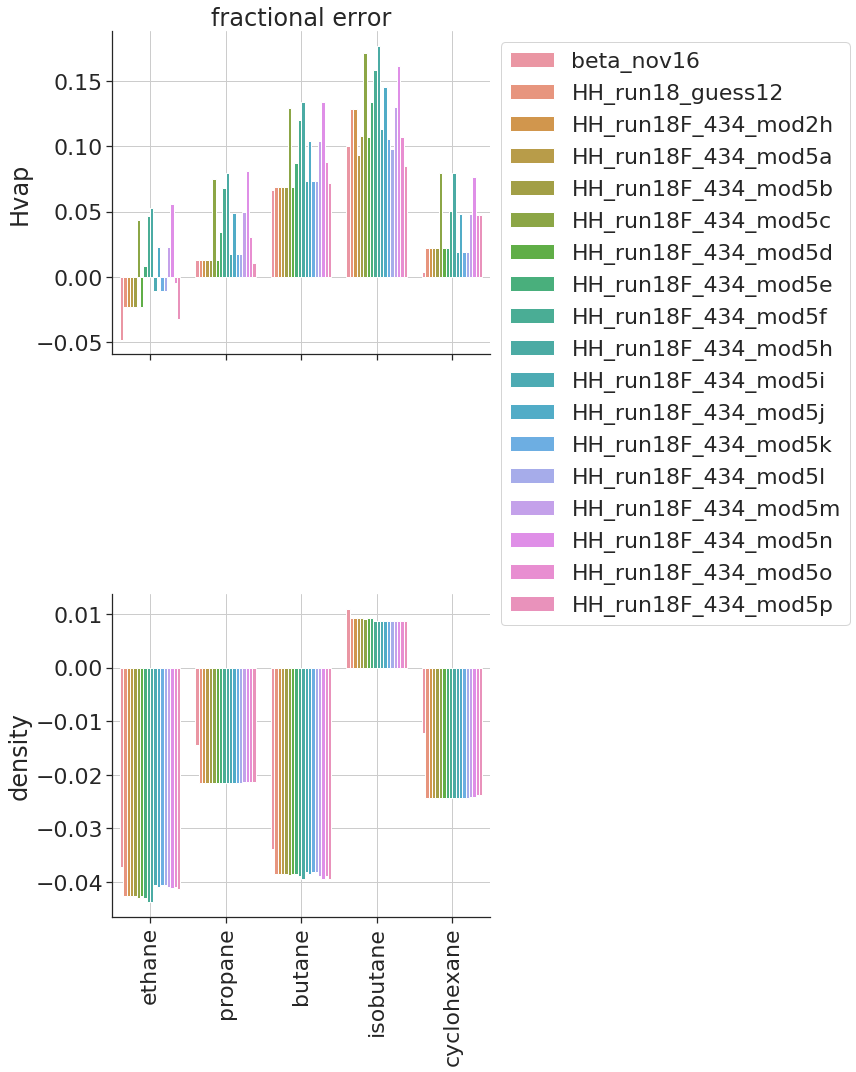

In [66]:
molecules = [
    'ethane', 'propane', 'butane', 'isobutane', 'cyclohexane',
]
e_functions = [
    'beta_nov16',
    'HH_run18_guess12',
    'HH_run18F_434_mod2h',
    'HH_run18F_434_mod5a',
    'HH_run18F_434_mod5b',
    'HH_run18F_434_mod5c',
    'HH_run18F_434_mod5d',
    'HH_run18F_434_mod5e',
    'HH_run18F_434_mod5f',
    'HH_run18F_434_mod5h',
    'HH_run18F_434_mod5i',
    'HH_run18F_434_mod5j',
    'HH_run18F_434_mod5k',
    'HH_run18F_434_mod5l',
    'HH_run18F_434_mod5m',
    'HH_run18F_434_mod5n',
    'HH_run18F_434_mod5o',
    'HH_run18F_434_mod5p',
]
(fig, axs) = plt.subplots(
    nrows=2, sharex=True, figsize=[12,15]
)
for (i, metric) in enumerate(['Hvap', 'density']):
    g = sns.barplot(
        y=f'frac_error_{metric}', x='molecule',
        hue='e_function', order=molecules,
        data=snap_df, ax=axs[i], hue_order=e_functions
    )
    if i == 1:    
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
        axs[i].get_legend().remove()
        #axs[i].set(ylim=[-0.1, 0.1])
    else:
        axs[i].legend(bbox_to_anchor=(1,1))
        axs[i].set(title='fractional error')
    axs[i].set(xlabel='', ylabel=metric)
    axs[i].grid()

plt.tight_layout()
sns.despine()
plt.show()

Questions
* why dielectric of 6? instead of ~1-2?

Analyze snapshots from Hahnbeom

In [30]:
# Define input variables
score_app_path = '/home/haddox/Rosetta/main/source/bin/score.default.linuxgccrelease'

# Cycle through energy functions and score snapshots
e_functions = [
    'beta_nov16', #'beta_nov16_fixed',
    #'beta_nov16_fullrep'
    #'HH_run18C_step286',
    #'HH_run18_guess6', 'HH_run18_guess6_fixed',
    #'HH_run18_guess7', 'HH_run18_guess8',
    #'HH_run18_guess9', 'HH_run18_guess10',
    'HH_run18_guess12',
]
for e_function in e_functions:
    weights_file = os.path.join(
        'data/liquid_sim_weights_files/',
        e_functions_dict[e_function][0]
    )
    flags_file = os.path.join(
        '/home/haddox/2019/optE_eval/data/',
        e_functions_dict[e_function][1]
    )

    # Define the output directory
    output_dir = os.path.join(
        resultsdir,
        'snapshots',
        e_function
    )
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)

    # Cycle over molecules and score snapshots for each one
    molecules = [
        'ethane', 'propane', 'butane', 'isobutane', #'cyclohexane',
        #'benzene', 'toluene'
    ]
    for molecule in molecules:

        # Get inputs for the current molecule
        #params_file = f'data/{molecule}/LG.params'
        params_file = f'data/params.beta_nov15/{molecule}.params'
        silent_files = glob.glob(f'/net/scratch/hpark/liquidsim_trjs/{molecule}*.out')

        # Score each silent file
        for silent_file in silent_files:
            output_file = os.path.join(
                output_dir, os.path.basename(silent_file)
            ).replace('.out', '.sc')
            cmd = ' '.join([
                score_app_path,
                f'-in:file:silent {silent_file}',
                '-in:file:fullatom',
                '-symmetry_definition dummy',
                '@data/flags.liquidsim',
                f'@{flags_file}',
                f'-score:weights {weights_file}',
                '-score:grpelec_fade_type grpsubtract',
                '-score:elec_r_option true',
                '-score:elec_max_dis 6.0',
                '-score:fa_max_dis 6.0',
                f'-extra_res_fa {params_file}',
                f'-out:file:scorefile {output_file}'
            ])

            sbatch_file = output_file.replace('.sc', '.sbatch')
            if not os.path.isfile(sbatch_file):
                print(molecule, e_function)
                design_utils.WriteSbatchFile(
                    sbatch_file,
                    command=cmd,
                    queue_type='short',
                    memory='2g'
                )
                ! sbatch {sbatch_file}

Estimate values

In [31]:
# Cycle through energy functions and estimate properties
e_functions = [
    'beta_nov16', 'beta_nov16_fixed',
    #'beta_nov16_fullrep'
    #'HH_run18C_step286',
    'HH_run18_guess6', 'HH_run18_guess6_fixed',
    'HH_run18_guess7', 'HH_run18_guess8',
    'HH_run18_guess9', 'HH_run18_guess10',
]
for e_function in e_functions:

    output_dir = os.path.join(
        resultsdir,
        'snapshots',
        e_function
    )
    score_files = glob.glob(os.path.join(
        output_dir,
        '*.sc'
    ))
    patterns_to_ignore = [
        'CHX0.05', 'CHX0.08', 'Hapo0.25', 'Hapo0.35'
    ]
    for pattern in patterns_to_ignore:
        score_files = [
            f for f in score_files
            if pattern not in f
        ]

    cmd = ' '.join(
        ['perl', 'scripts/static_liqsim.pl', '0.25'] + score_files
    )
    if True:
        sbatch_file = os.path.join(
            output_dir,
            'sim_vals.sbatch'
        )
        if not os.path.isfile(sbatch_file):
            design_utils.WriteSbatchFile(
                sbatch_file,
                command=cmd,
                queue_type='short',
                memory='2g'
            )
            ! sbatch {sbatch_file}

Submitted batch job 6442653
Submitted batch job 6442654
Submitted batch job 6442655
Submitted batch job 6442656
Submitted batch job 6442657
Submitted batch job 6442658
Submitted batch job 6442659
Submitted batch job 6442660


In [48]:
cmd + ' > results/snapshots/HH_run18_guess6/est.out'

'perl scripts/static_liqsim.pl 0.25 results/snapshots/HH_run18_guess10/ethane.CHX2.05.Hatr.sc results/snapshots/HH_run18_guess10/propane.Hapo1.5.Hatr.sc results/snapshots/HH_run18_guess10/propane.CHX2.00.Hatr.sc results/snapshots/HH_run18_guess10/isobutane.Hapo1.5.Hatr.sc results/snapshots/HH_run18_guess10/isobutane.CHX2.00.Hatr.sc results/snapshots/HH_run18_guess10/isobutane.CHX2.05.Hatr.sc results/snapshots/HH_run18_guess10/ethane.CHX2.00.Hatr.sc results/snapshots/HH_run18_guess10/propane.CHX2.05.Hatr.sc results/snapshots/HH_run18_guess10/ethane.Hapo1.5.Hatr.sc results/snapshots/HH_run18_guess10/ethane.Hapo1.3.Hatr.sc results/snapshots/HH_run18_guess10/ethane.CHX1.90.Hatr.sc results/snapshots/HH_run18_guess10/propane.CHX1.90.Hatr.sc results/snapshots/HH_run18_guess10/propane.Hapo1.3.Hatr.sc results/snapshots/HH_run18_guess10/isobutane.Hapo1.3.Hatr.sc results/snapshots/HH_run18_guess10/isobutane.CHX1.90.Hatr.sc > results/snapshots/HH_run18_guess6/est.out'

In [44]:
names = [
    'molecule',
    'Hvap_est', 'Hvap_calc', 'Hvap_ref',
    'density_est', 'density_calc', 'density_ref' 
]
dfs = []
for e_function in e_functions:
    output_dir = os.path.join(
        resultsdir,
        'snapshots',
        e_function
    )
    output_file = os.path.join(
        output_dir,
        'sim_vals.sbatch.out'
    )
    df = pandas.read_csv(
        output_file, sep='\s+', names=names, skiprows=1
    )
    df['e_function'] = e_function
    dfs.append(df)

snap_df = pandas.concat(dfs, sort=True)
snap_df.sort_values('molecule', inplace=True)
snap_df['snap_Hvap'] = snap_df['Hvap_est']
snap_df['snap_density'] = snap_df['density_est']
snap_df.head()

Hvap_calc  Hvap_est  Hvap_ref  density_calc  density_est  density_ref  \
0   3.215995  3.197924      3.52      0.536587     0.517160        0.546   
2   3.340074  3.508122      3.52      0.566173     0.635507        0.546   
0   3.340074  3.508122      3.52      0.566173     0.635507        0.546   
0   3.242849  3.265059      3.52      0.537453     0.520627        0.546   
2   3.264820  3.319987      3.52      0.539027     0.526920        0.546   

         e_function molecule  snap_Hvap  snap_density  
0  HH_run18_guess10   ethane   3.197924      0.517160  
2        beta_nov16   ethane   3.508122      0.635507  
0  beta_nov16_fixed   ethane   3.508122      0.635507  
0   HH_run18_guess9   ethane   3.265059      0.520627  
2   HH_run18_guess8   ethane   3.319987      0.526920

In [45]:
cols = [
    'molecule', 'e_function', 'snap_Hvap', 'snap_density'
]
data = est_df.merge(
    snap_df[cols], on=['molecule', 'e_function']
)

In [47]:
data[[
    'molecule', 'e_function', 'est_Hvap', 'snap_Hvap',
    'Hvap', 'density'
]].head(n=10)

molecule       e_function  est_Hvap  snap_Hvap  Hvap  density
0     ethane       beta_nov16  3.230170   3.508122  3.51    0.546
1     ethane  HH_run18_guess6  3.527255   3.415051  3.51    0.546
2    propane       beta_nov16  4.273452   4.742292  4.49    0.581
3    propane  HH_run18_guess6  4.559375   4.407953  4.49    0.581
4  isobutane       beta_nov16  4.686496   4.788003  4.57    0.551
5  isobutane  HH_run18_guess6  5.426617   4.708493  4.57    0.551

In [ ]:
cmd = ' '.join([
    score_app_path,
    f'-in:file:silent {silent_file}',
    '-in:file:fullatom',
    '-symmetry_definition dummy',
    '@data/flags.liquidsim',
    f'@{flags_file}',
    f'-score:weights {weights_file}',
    '-score:grpelec_fade_type grpsubtract',
    '-score:elec_r_option true',
    '-score:elec_max_dis 6.0',
    '-score:fa_max_dis 6.0',
    f'-extra_res_fa {params_file}',
    f'-out:file:scorefile {output_file}'
])

In [ ]:

        -score:elec_group_extrafile /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/params/$tag.groupdef \

In [ ]:
~/Rosetta/main/source/bin/score_jd2.default.linuxgccrelease \
        -in:file:silent  /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/$silent \
        -in:file:fullatom \
        -symmetry_definition dummy \
        @flags \
        @flags_$num \
        @flags_liq_$num \
        -score:weights $weights \
        -score:grpelec_fade_type grpsubtract \
        -score:elec_r_option true \
        -score:elec_max_dis 6.0 \
        -score:fa_max_dis 6.0 \
        -out:file:scorefile opt_$num/$silent.sc.liqsim \
        -overwrite \
        -score:elec_group_extrafile /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/params/$tag.groupdef \
        -extra_res_fa /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/params/$tag.params

In [ ]:
~/Rosetta/main/source/bin/score_jd2.default.linuxgccrelease \
    -in:file:silent  /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/$silent \
    -in:file:fullatom \
    -symmetry_definition dummy \
    @flags \
    @flags_$num \
    @flags_liq_$num \
    -score:weights $weights \
    -score:grpelec_fade_type grpsubtract \
    -score:elec_r_option true \
    -score:elec_max_dis 6.0 \
    -score:fa_max_dis 6.0 \
    -out:file:scorefile opt_$num/$silent.sc.liqsim \
    -overwrite \
    -score:elec_group_extrafile /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/params/$tag.groupdef \
    -extra_res_fa /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/params/$tag.params

In [ ]:
/home/haddox/Rosetta/main/source/bin/score.default.linuxgccrelease
    -in:file:silent /net/scratch/hpark/liquidsim_trjs/ethane.CHX0.05.Hatr.out
    -in:file:fullatom
    -symmetry_definition dummy
    @data/flags.liquidsim
    @/home/haddox/2019/optE_eval/data/flags_beta16
    -score:weights data/liquid_sim_weights_files/beta_nov16.wts
    -score:grpelec_fade_type grpsubtract
    -score:elec_r_option true
    -score:elec_max_dis 6.0
    -score:fa_max_dis 6.0
    -extra_res_fa data/params.beta_nov15/ethane.params
    -out:file:scorefile results/snapshots/beta_nov16/ethane.CHX0.05.Hatr.sc

In [ ]:


    @flags \
    @flags_$num \
    @flags_liq_$num \
    -score:weights $weights \

    -score:elec_group_extrafile /usr/lusers/dimaio/dimaio/decoys/liquid_snapshots/params/$tag.groupdef \


In [ ]:


    @data/flags.liquidsim
    @/home/haddox/2019/optE_eval/data/flags_beta16
    -score:weights data/liquid_sim_weights_files/beta_nov16.wts


In [ ]:
~/Rosetta/main/source/bin/rosetta_scripts.default.linuxgccrelease

    -parser:protocol scripts/prod.xml
    -s data/ethane_v2/LG_0001.pdb
    -parser:script_vars  nmol=4 scfilename=results/four_by_four/beta_nov16/ethane_v2/prod.sc outname=results/four_by_four/beta_nov16/ethane_v2/prod.out density=0.546 temperature=185 istart=1

In [ ]:
/home/haddox/Rosetta/main/source/bin/score.default.linuxgccrelease
    -in:file:silent results/four_by_four/beta_nov16/ethane_v2/prod.out
    -in:file:fullatom
    -symmetry_definition dummy